<a href="https://colab.research.google.com/github/echukwuka/Cookbook/blob/master/ChemInformatics_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


*Function* for excuting systems commands


In [2]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

**ChemInformatics**

In [3]:
install.packages("rcdk")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rcdklibs’, ‘fingerprint’, ‘rJava’, ‘png’, ‘iterators’, ‘itertools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(rcdk)
library(grid)
library(gridExtra)


Loading required package: rcdklibs

Loading required package: rJava



2. Code for viewing structure from smiles format 
to get smiles string from structure use the http://www.chemspider.com/StructureSearch.aspx to draw structure. Then use Save as option in daylight format 

**1. SMILES Notation**

**Simple Chains**

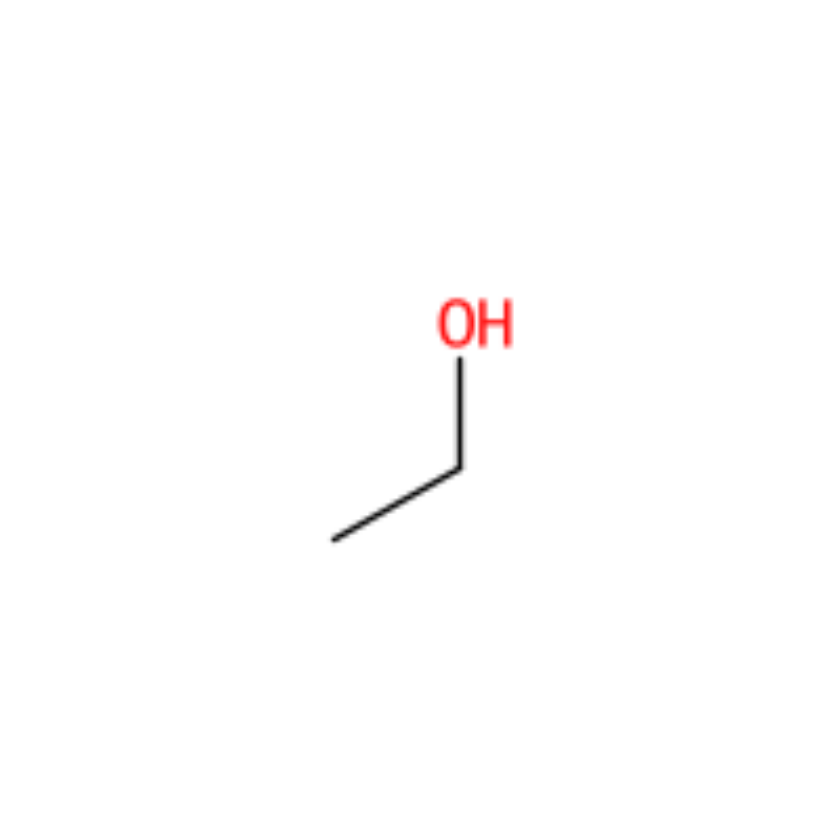

In [5]:
mols = parse.smiles("CCO") # 
img = view.image.2d(mols[[1]])
grid.raster(img)

In [6]:
mols2grobs<-function(mols_list, smarts){
library(grid)
if(missing(smarts)) { smarts='*' }
img_list = lapply(mols_list, function(x){view.image.2d(x, depictor=get.depictor(sma=smarts))})
lapply(img_list, function(x){rasterGrob(x)})
}


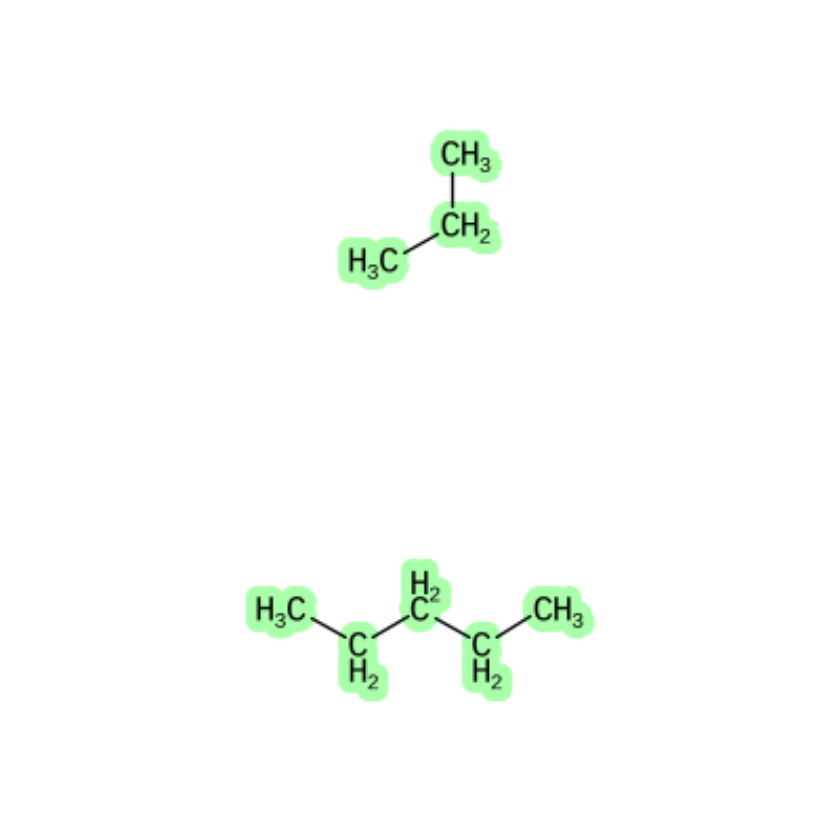

In [7]:
mols = parse.smiles(c('CCC','CCCCC')) 
grobs_list=mols2grobs(mols)
grid.arrange(grobs=grobs_list, nrow=2)

**Bonds**

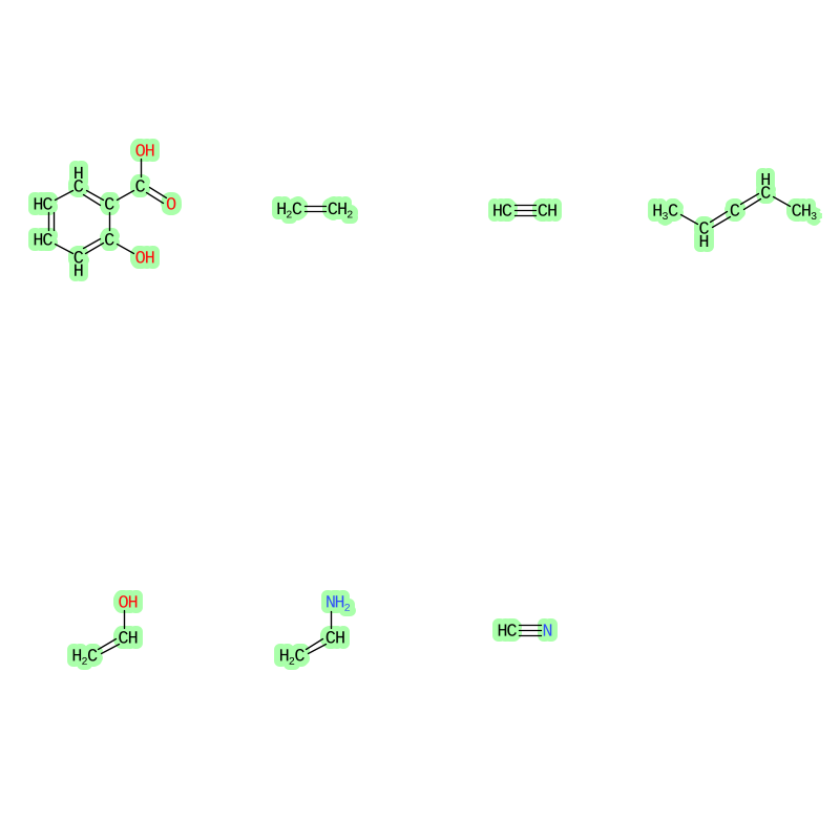

In [8]:
mols = parse.smiles(c('OC(=O)c1ccccc1O','C=C','C#C','CC=C=CC','C=CO','C=CN','C#N')) 
grobs_list=mols2grobs(mols)
grid.arrange(grobs=grobs_list, nrow=2)

**Branches**

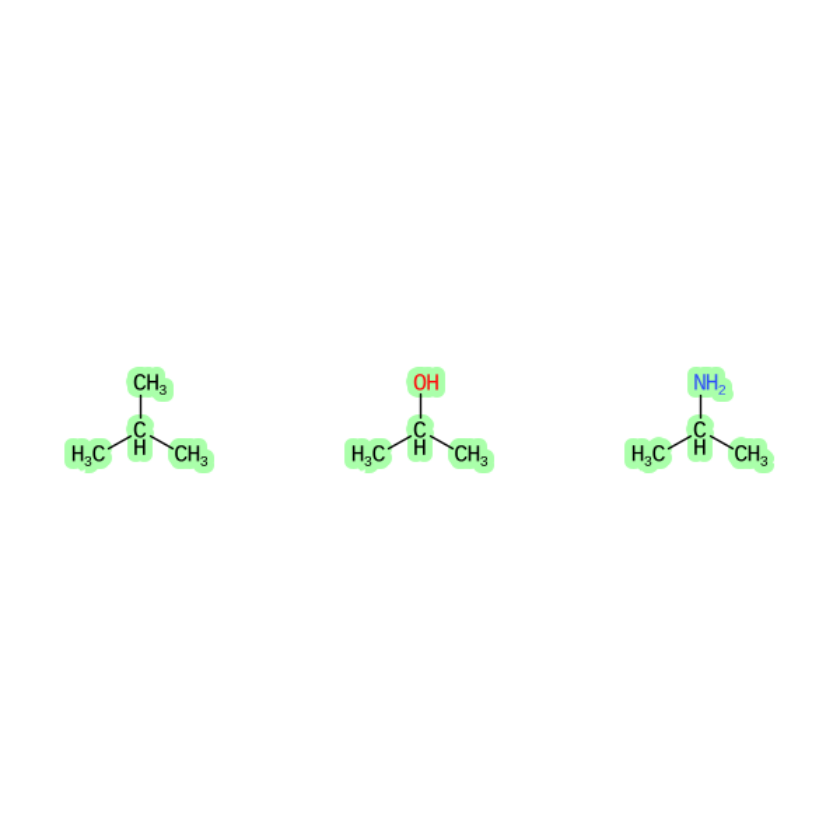

In [9]:
mols = parse.smiles(c('CC(C)C','CC(O)C','CC(N)C')) 
grobs_list=mols2grobs(mols)
grid.arrange(grobs=grobs_list, nrow=1)

**Rings**

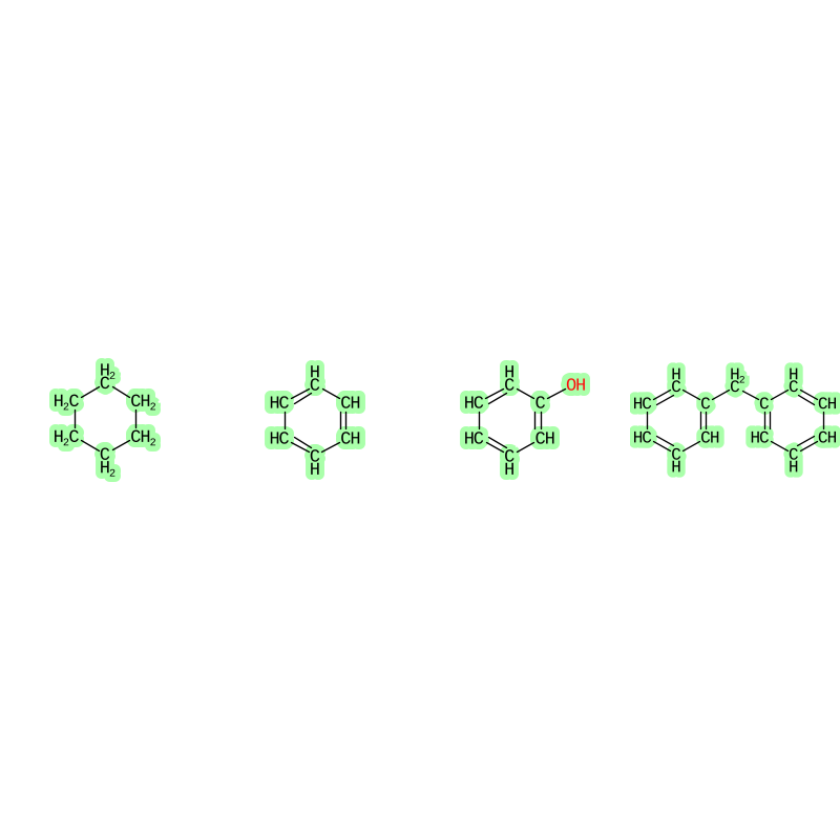

In [10]:
mols = parse.smiles(c('C1CCCCC1','c1ccccc1','c1ccccc1O','c1ccccc1Cc1ccccc1')) 
grobs_list=mols2grobs(mols)
grid.arrange(grobs=grobs_list, nrow=1)

**Cis-trans isomerism**

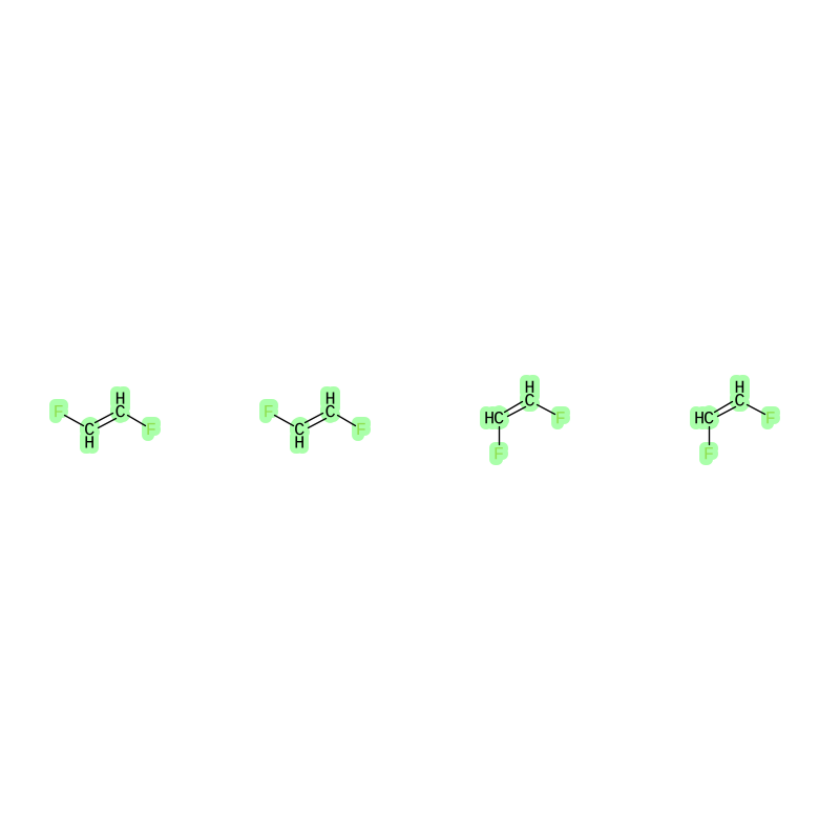

In [11]:
mols = parse.smiles(c('F/C=C/F','F\\C=C\\F','F/C=C\\F','F\\C=C/F'))
grobs_list=mols2grobs(mols)
grid.arrange(grobs=grobs_list, nrow=1)

**Optical isomerism**

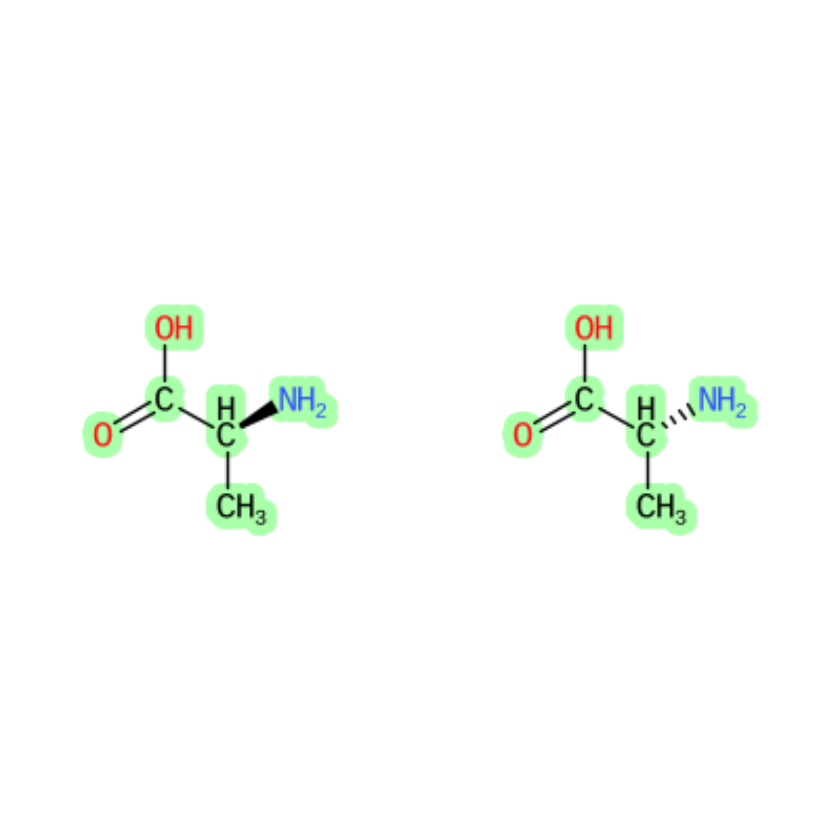

In [12]:
mols = parse.smiles(c('C[C@@H](C(=O)O)N','C[C@H](C(=O)O)N'))
grobs_list=mols2grobs(mols)
grid.arrange(grobs=grobs_list, nrow=1)

**2. SMARTS: Highlight substrcutural patterns/Pharmocophores** **bold text**

**Atoms**

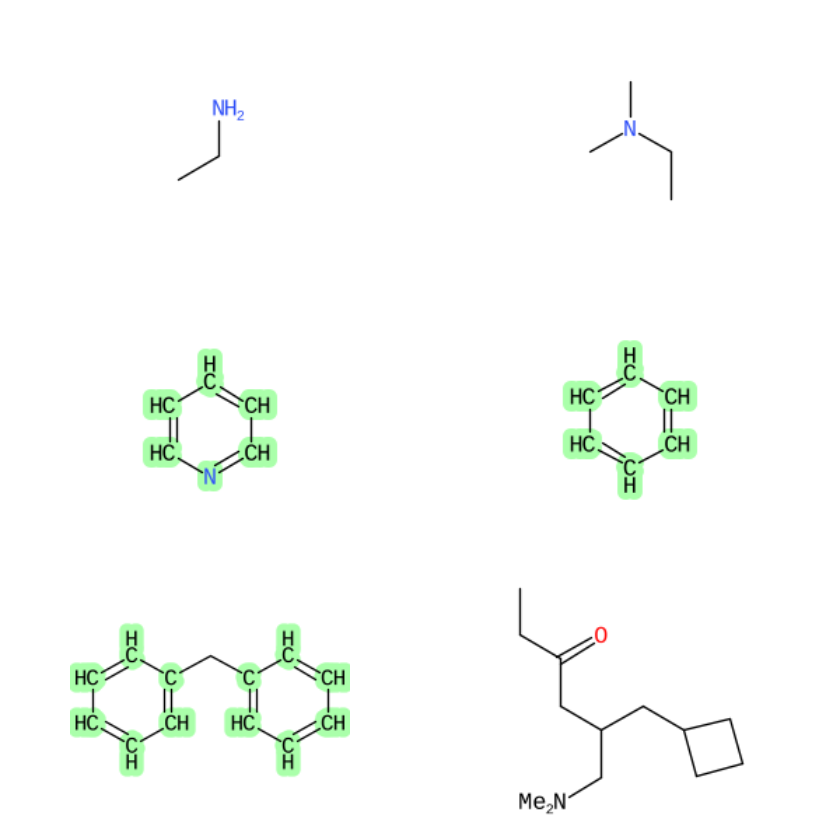

In [13]:
smiles = c('CCN','CCN(C)(C)','c1cnccc1','c1ccccc1','c1ccccc1Cc1ccccc1','C1CCC1CC(CN(C)(C))CC(=O)CC')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma='a') # Aromatic atom 
grid.arrange(grobs=grobs_list, ncol=2)

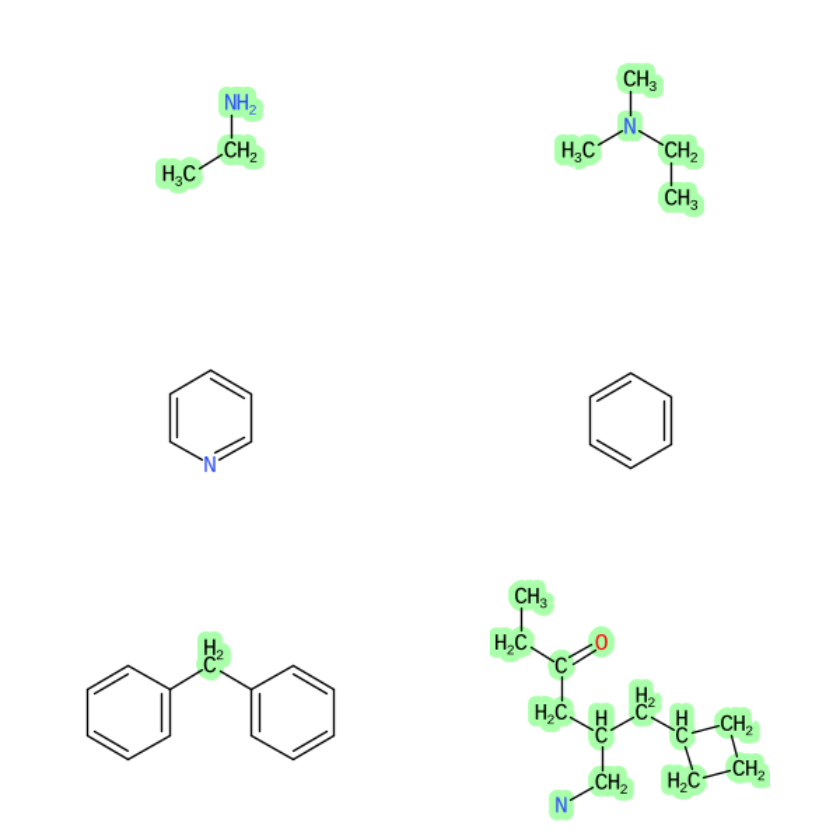

In [14]:
grobs_list=mols2grobs(mols, sma='A') # Aliphatic atom 
grid.arrange(grobs=grobs_list, ncol=2)

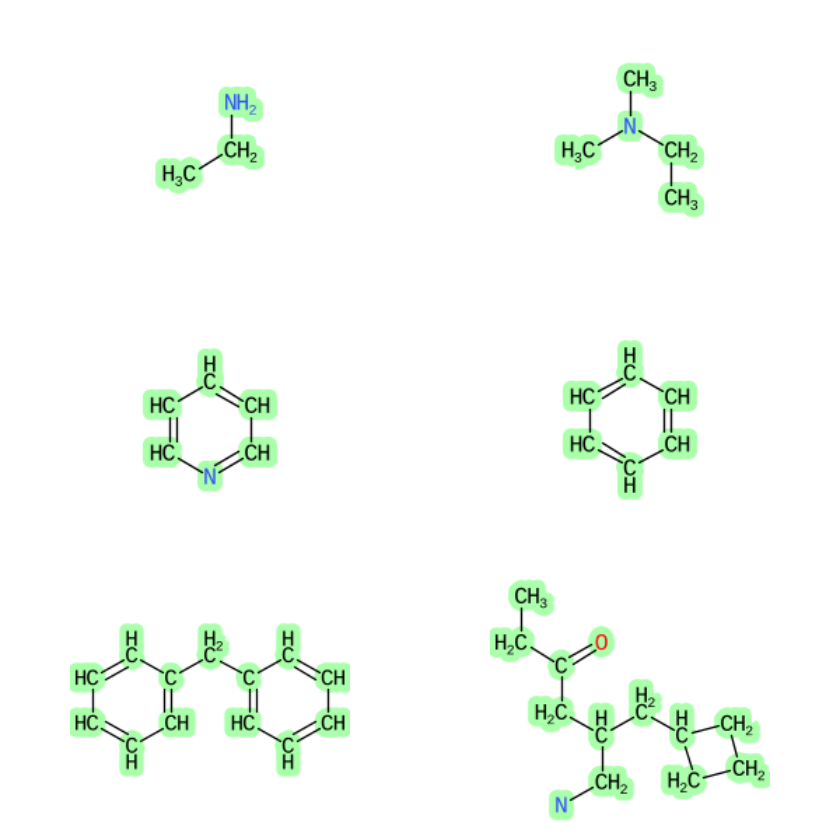

In [15]:
grobs_list=mols2grobs(mols, sma='*') # Any atom
grid.arrange(grobs=grobs_list, ncol=2)

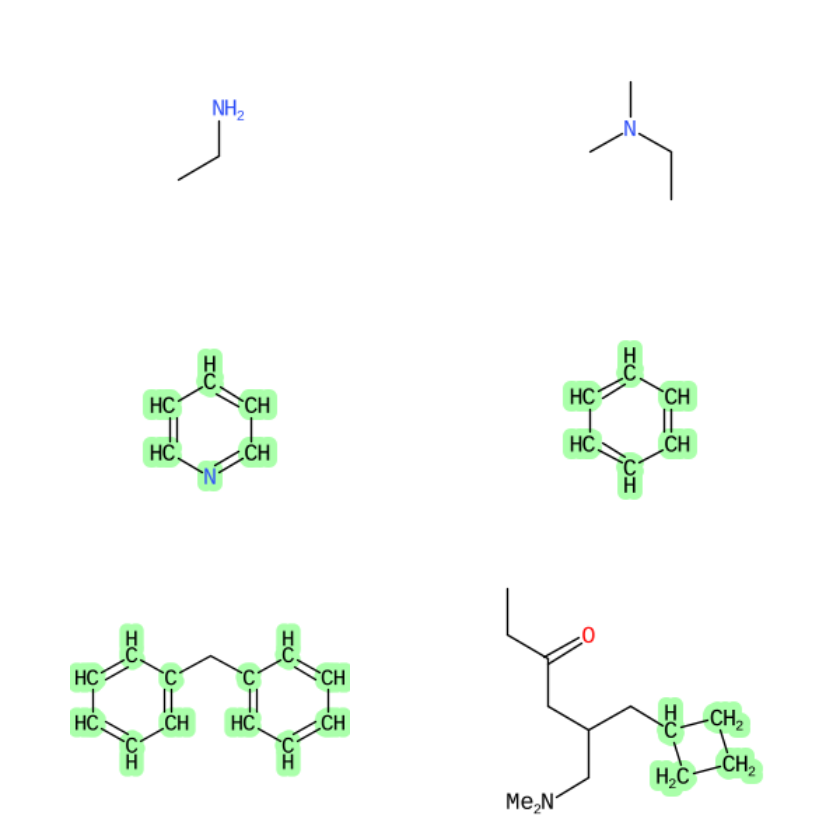

In [16]:
grobs_list=mols2grobs(mols, sma='[r]') #  Atoms in rings with any size
grid.arrange(grobs=grobs_list, ncol=2)

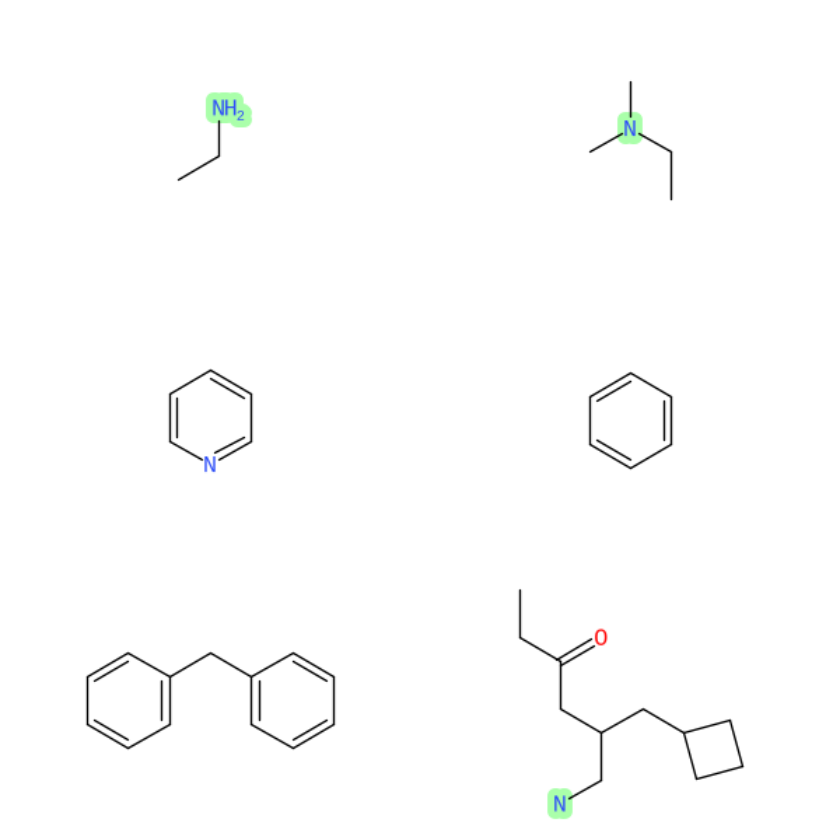

In [17]:
grobs_list=mols2grobs(mols, sma='N') # Aliphatic nitrogen atom
grid.arrange(grobs=grobs_list, ncol=2)

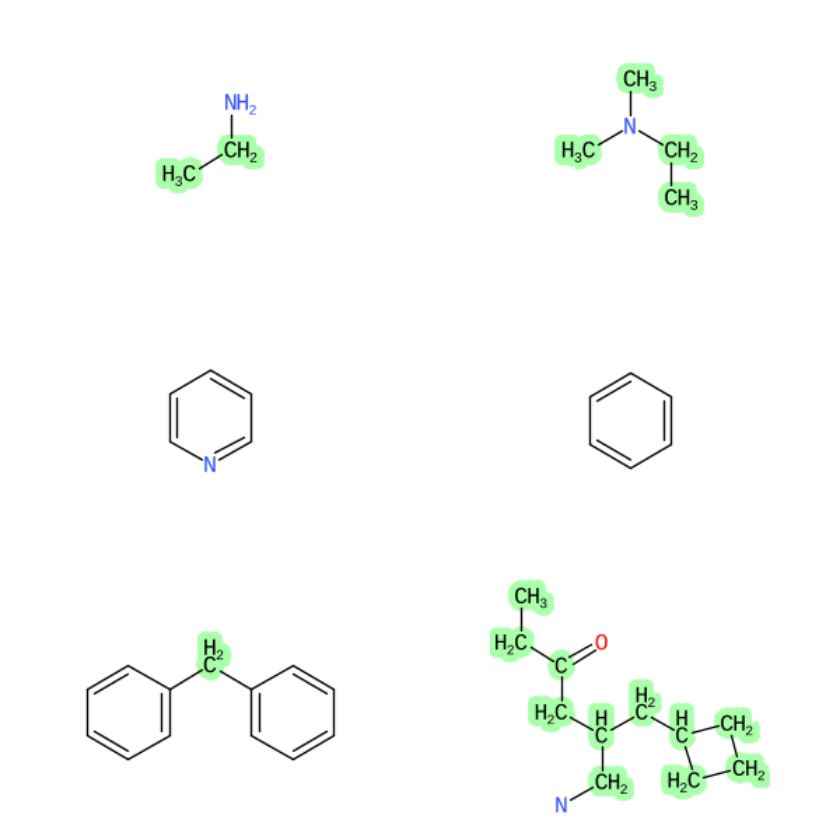

In [18]:
grobs_list=mols2grobs(mols, sma='C') # Aliphatic corban atom
grid.arrange(grobs=grobs_list, ncol=2)

**Highlight atoms based on attributes**

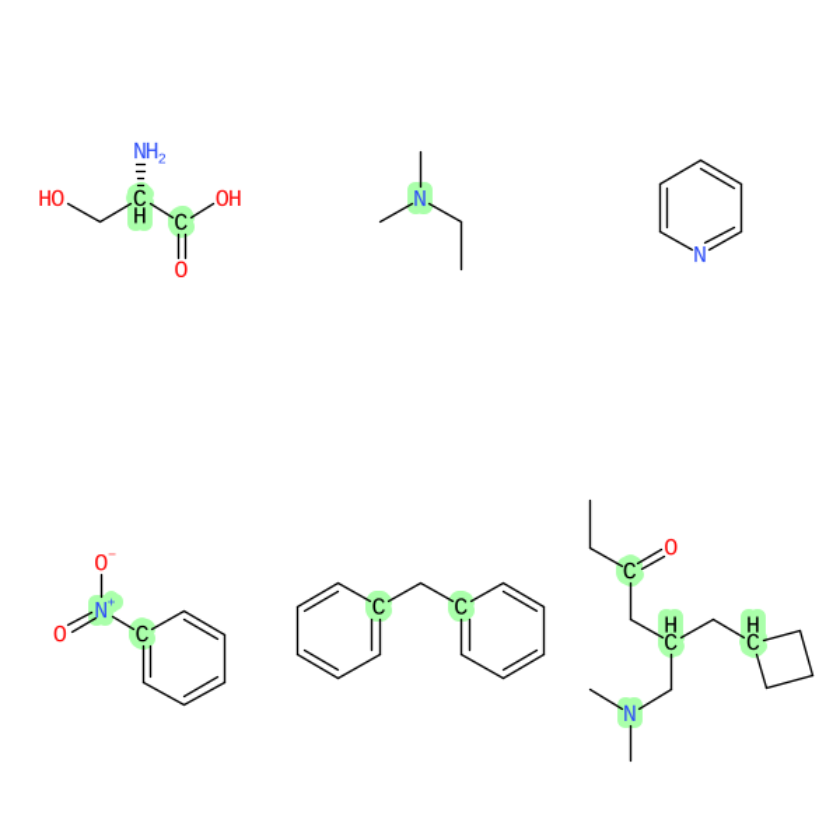

In [19]:
smiles = c('OC[C@@H](C(=O)O)N','CCN(C)(C)','c1cnccc1','C1=CC=C(C=C1)[N+](=O)[O-]','c1ccccc1Cc1ccccc1','C1CCC1CC(CN(C)(C))CC(=O)CC')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma='[D3]') #Degree- 3 Connections to any atom excluding implicit H
grid.arrange(grobs=grobs_list, ncol=3)

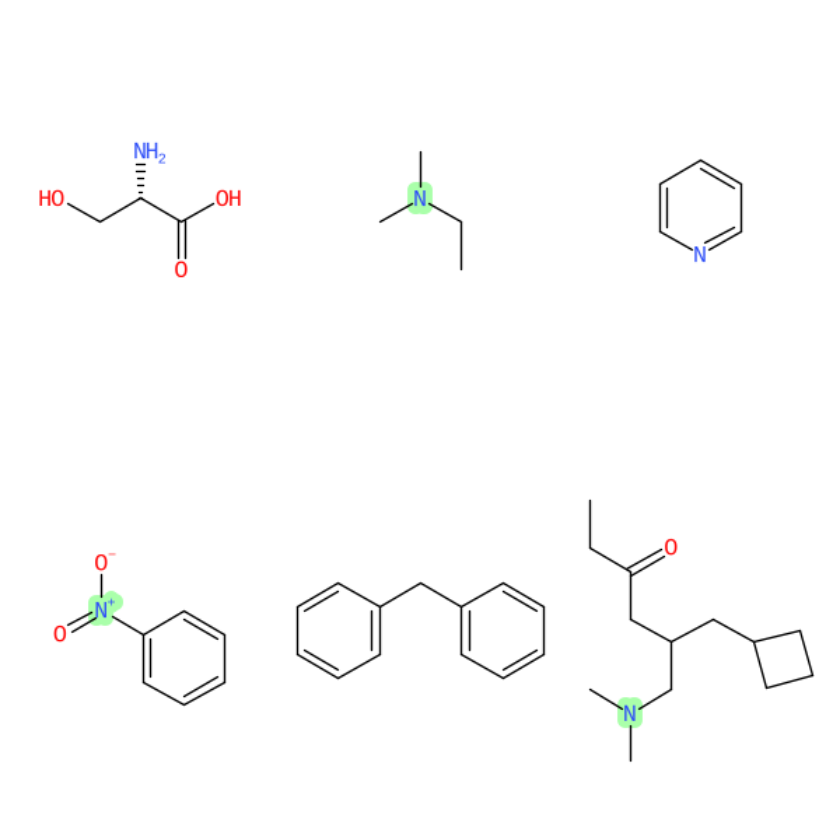

In [20]:
grobs_list=mols2grobs(mols, sma='[ND3]') #Degree- 3 Connections to N excluding H
grid.arrange(grobs=grobs_list, ncol=3)

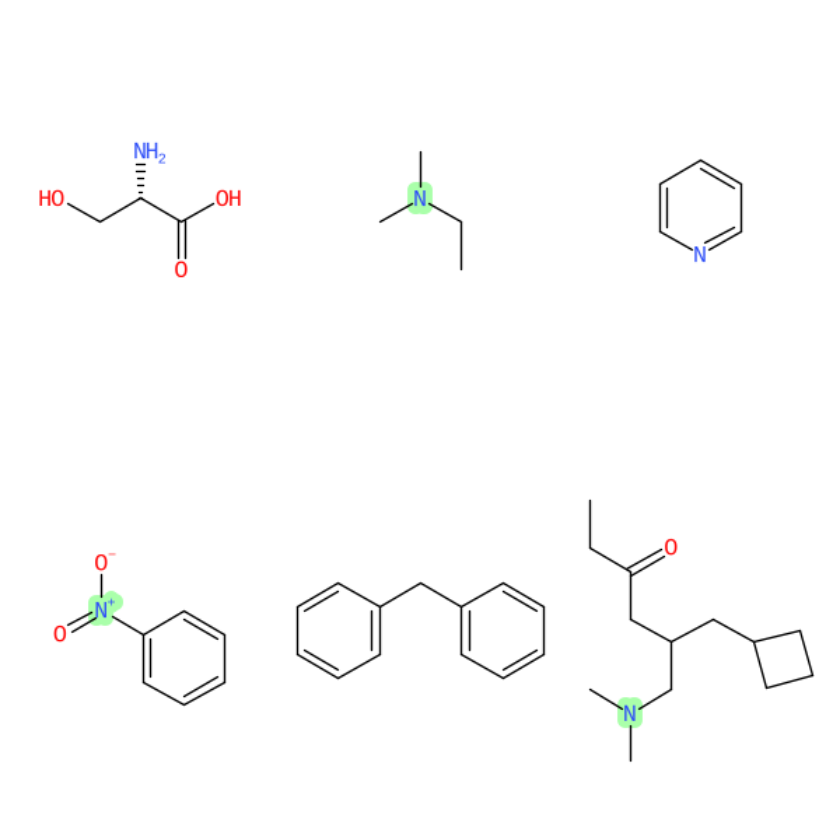

In [21]:
grobs_list=mols2grobs(mols, sma='[ND3]') #3 total connections to atom including H
grid.arrange(grobs=grobs_list, ncol=3)

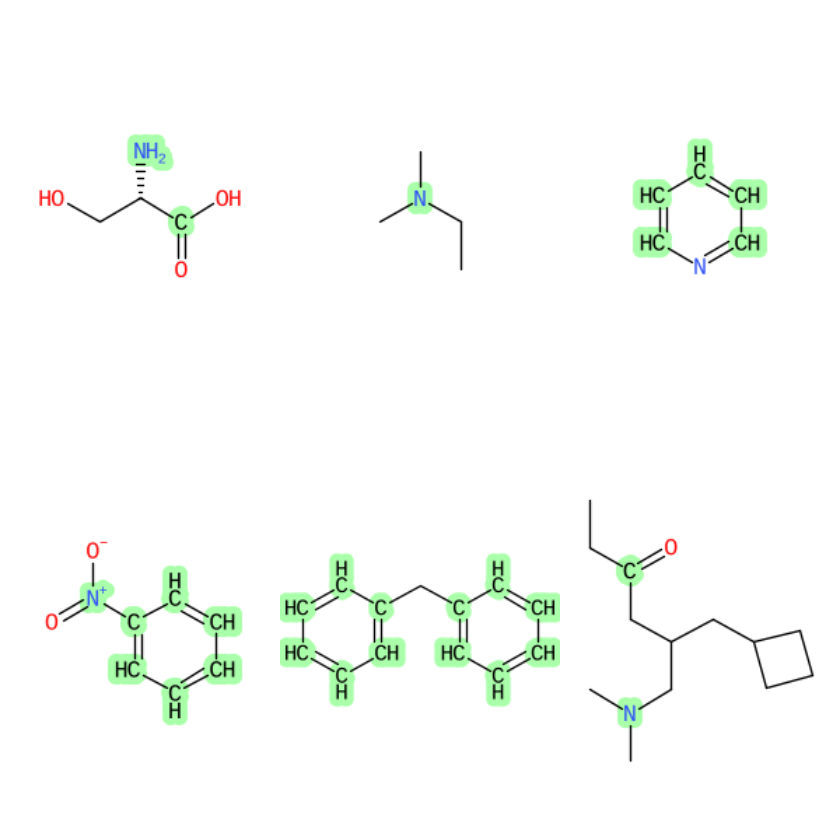

In [22]:
grobs_list=mols2grobs(mols, sma='[X3]') #3 total connections to atom including H
grid.arrange(grobs=grobs_list, ncol=3)

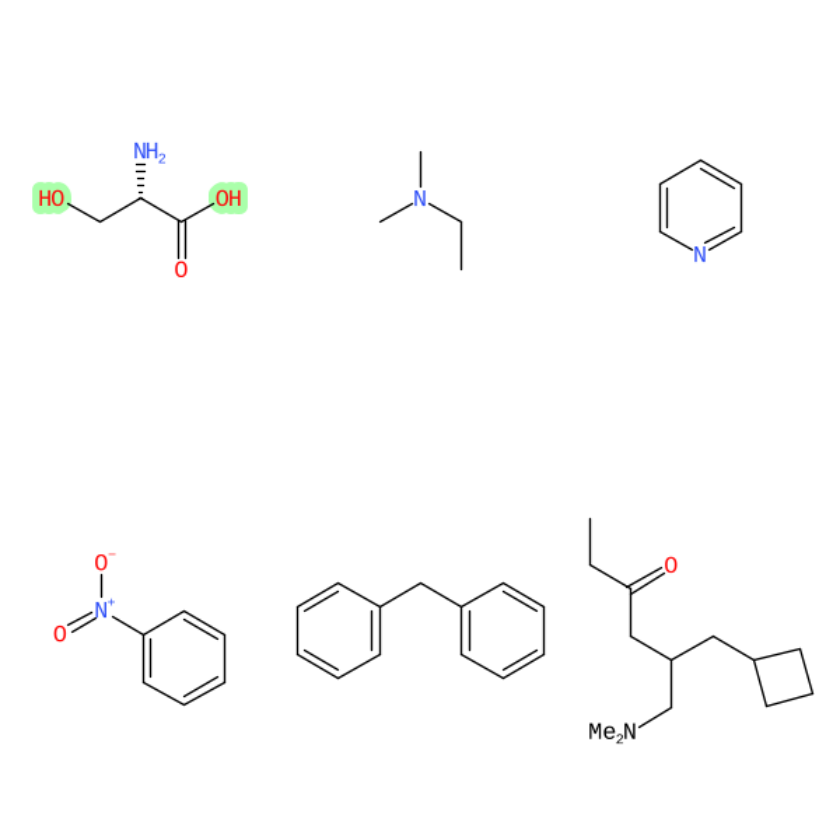

In [23]:
grobs_list=mols2grobs(mols, sma='[OX2]') #2 total connections to O including H
grid.arrange(grobs=grobs_list, ncol=3)

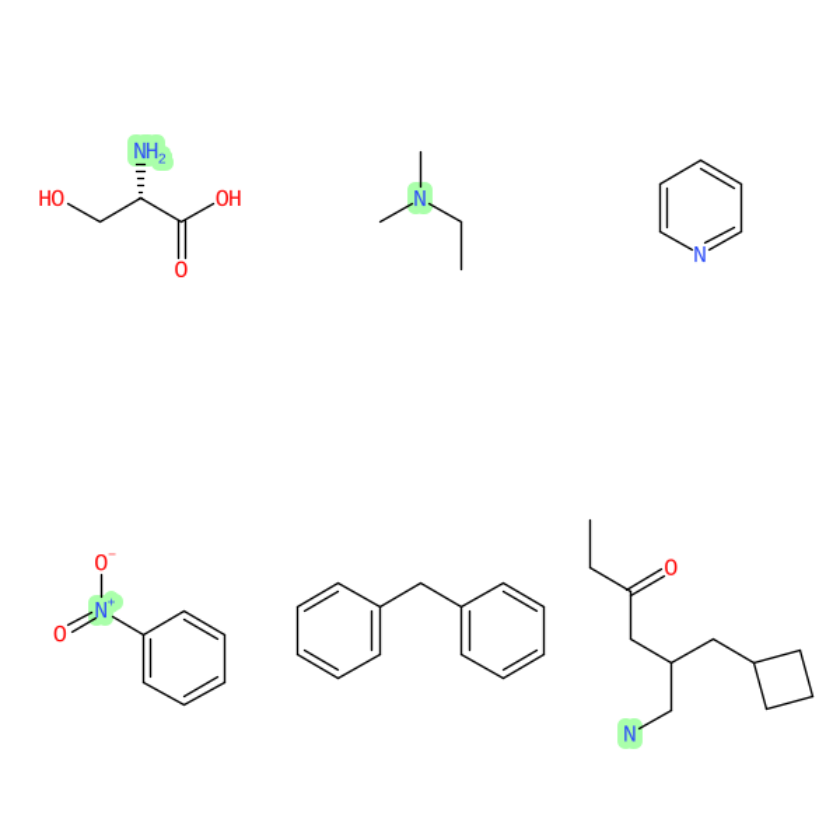

In [24]:
grobs_list=mols2grobs(mols, sma='[NX3]') #3 total connections to N including H
grid.arrange(grobs=grobs_list, ncol=3)

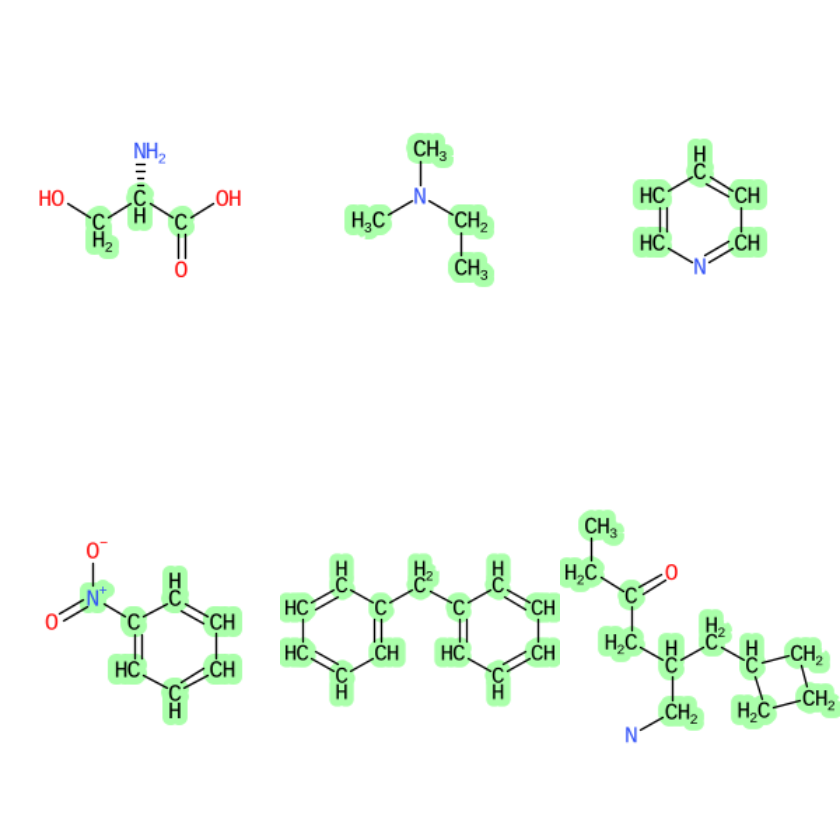

In [25]:
grobs_list=mols2grobs(mols, sma='[v4]') #3 Valence or bond order
grid.arrange(grobs=grobs_list, ncol=3)

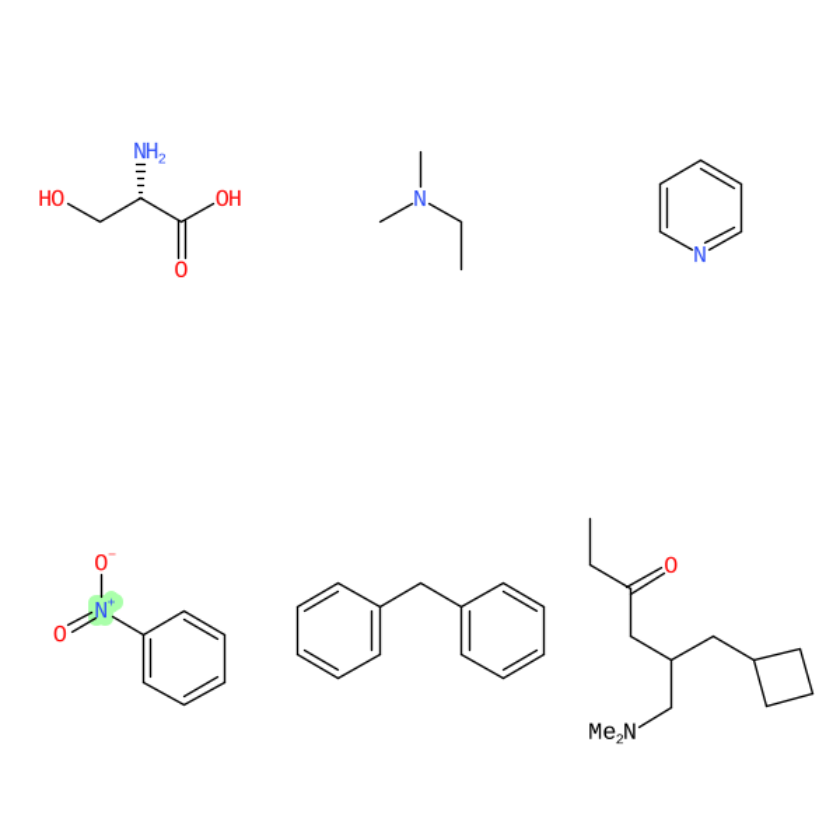

In [26]:
grobs_list=mols2grobs(mols, sma='[Nv4]') #3 Valence or bond order
grid.arrange(grobs=grobs_list, ncol=3)

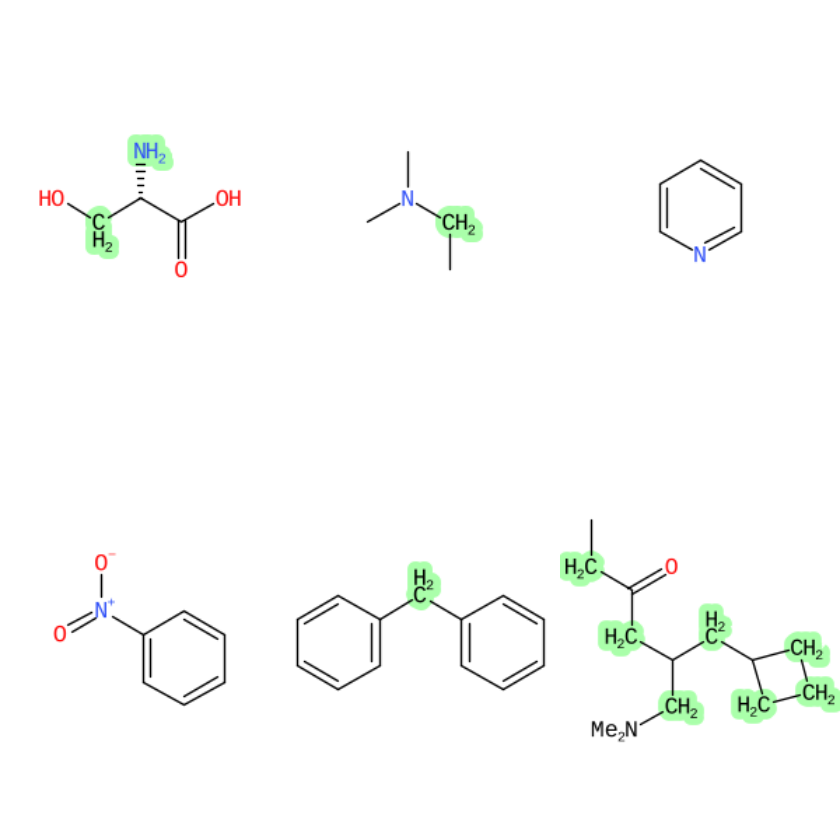

In [27]:
grobs_list=mols2grobs(mols, sma='[H2]') #Atoms attached two hydrogens
grid.arrange(grobs=grobs_list, ncol=3)

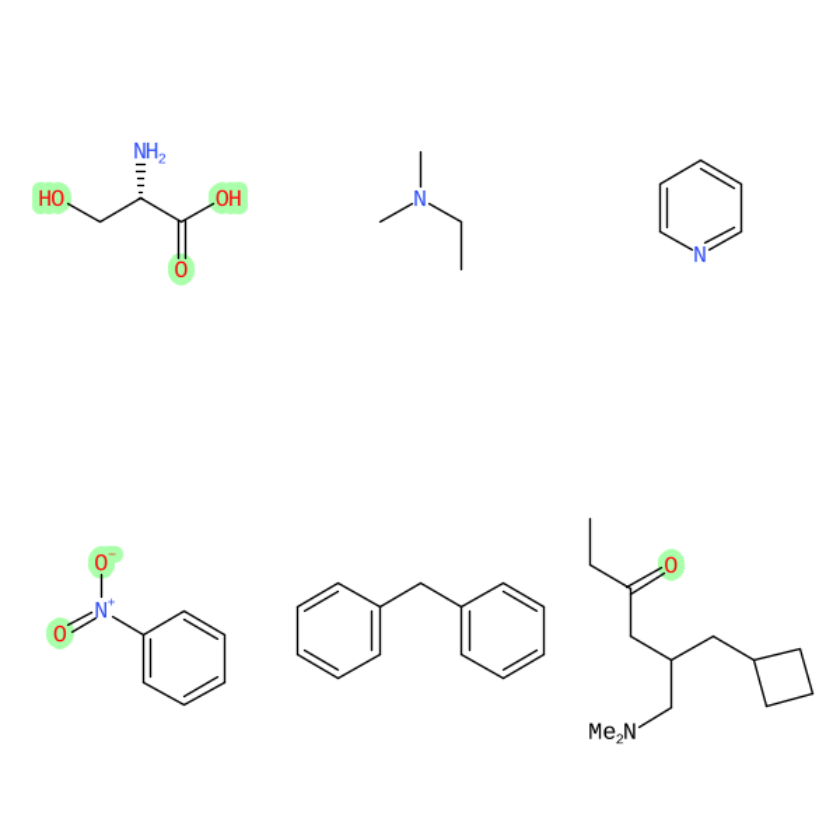

In [28]:
grobs_list=mols2grobs(mols, sma='[#8]') #Atoms number 8 (O)
grid.arrange(grobs=grobs_list, ncol=3)

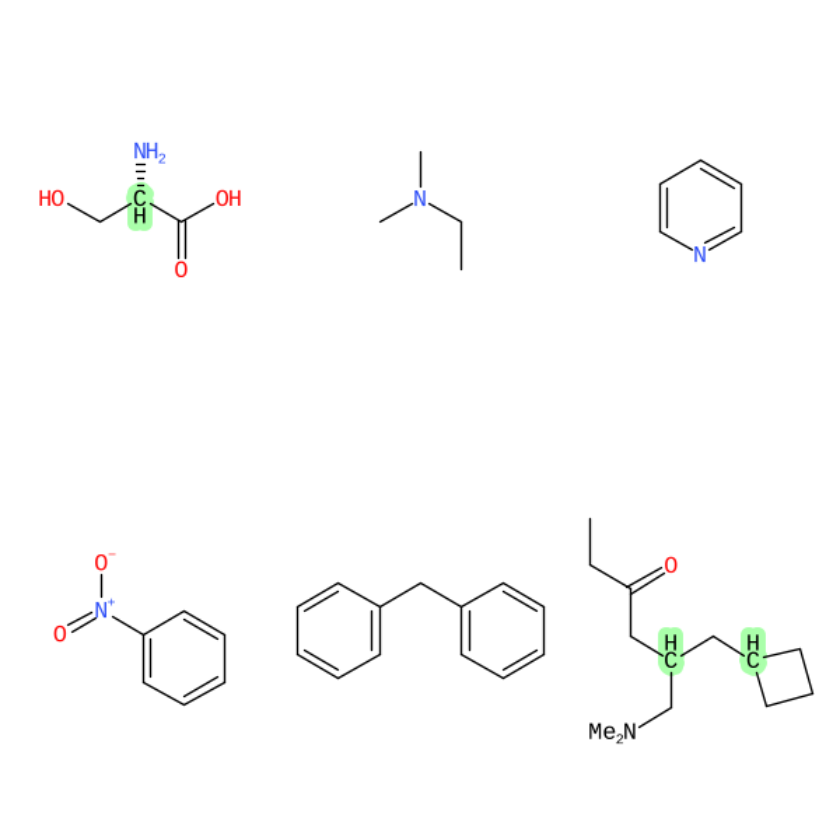

In [29]:
grobs_list=mols2grobs(mols, sma='[C@H]') #Chiral Corbon
grid.arrange(grobs=grobs_list, ncol=3)

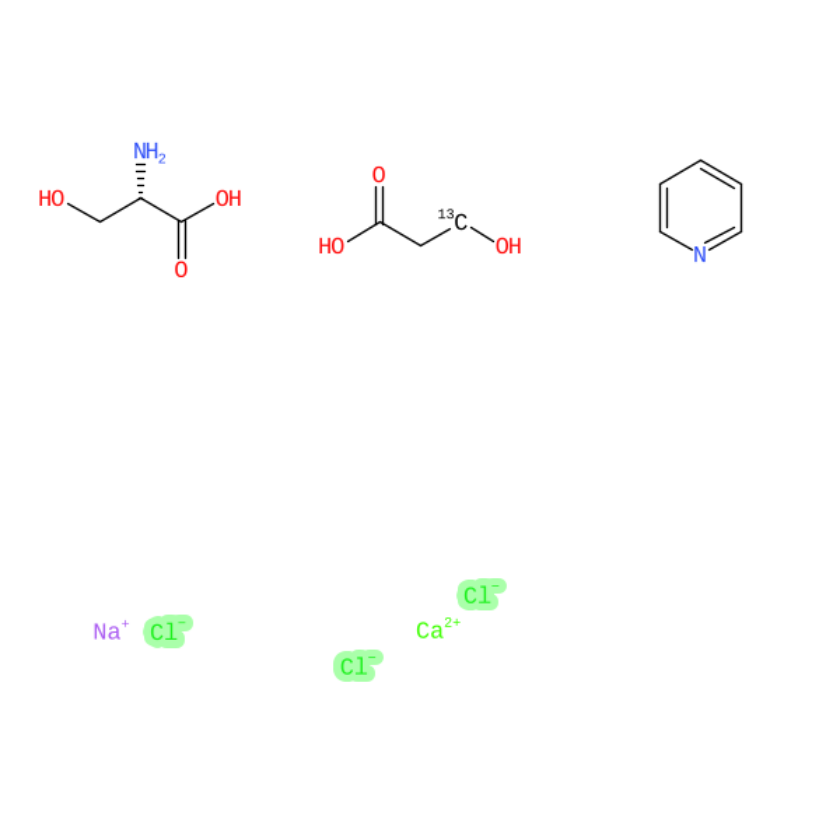

In [30]:
smiles = c('OC[C@@H](C(=O)O)N','O[13C]CC(=O)O','c1cnccc1','[Na+].[Cl-]','[Ca+2].[Cl-].[Cl-]')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma='[-1]') #Atoms with -1 charge
grid.arrange(grobs=grobs_list, ncol=3)

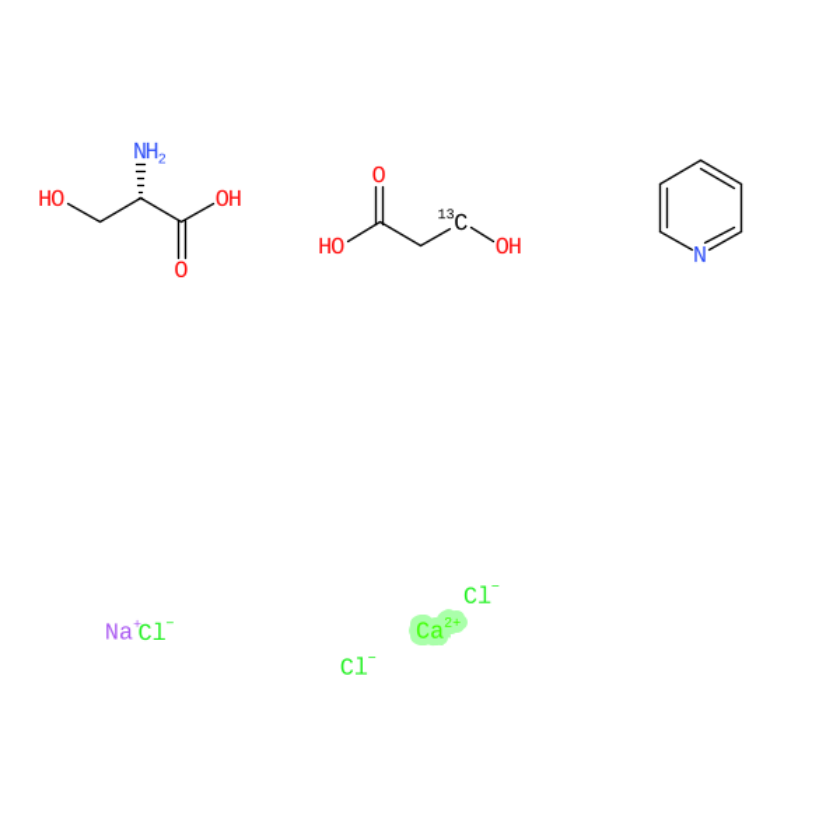

In [31]:
grobs_list=mols2grobs(mols, sma='[+2]') #Atoms with +2 charge
grid.arrange(grobs=grobs_list, ncol=3)

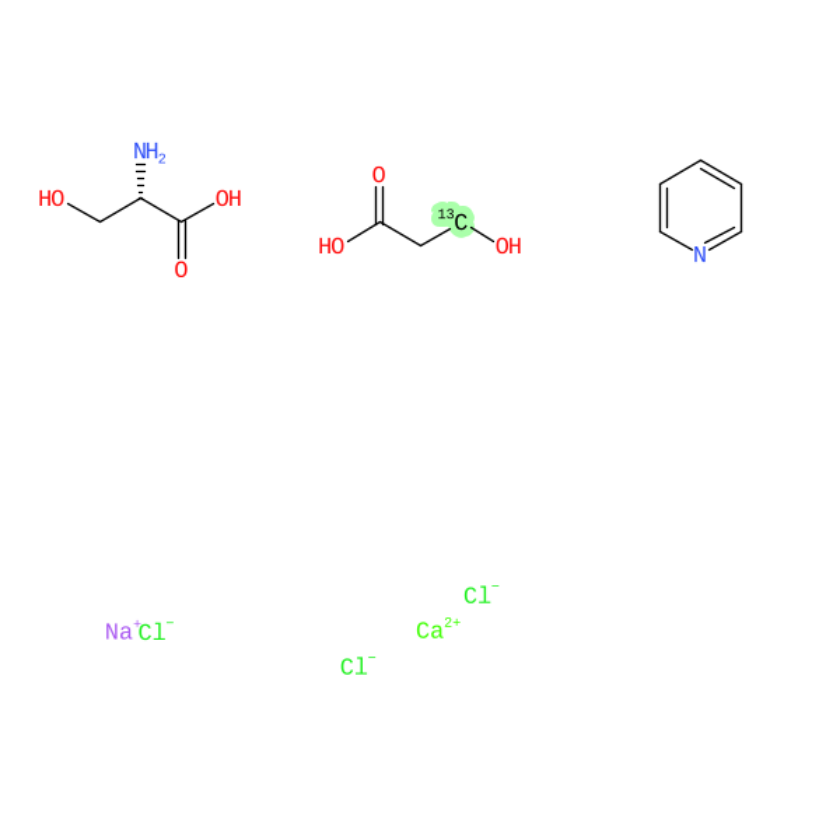

In [32]:
grobs_list=mols2grobs(mols, sma='[13]') #Any atom with mass 13
grid.arrange(grobs=grobs_list, ncol=3)

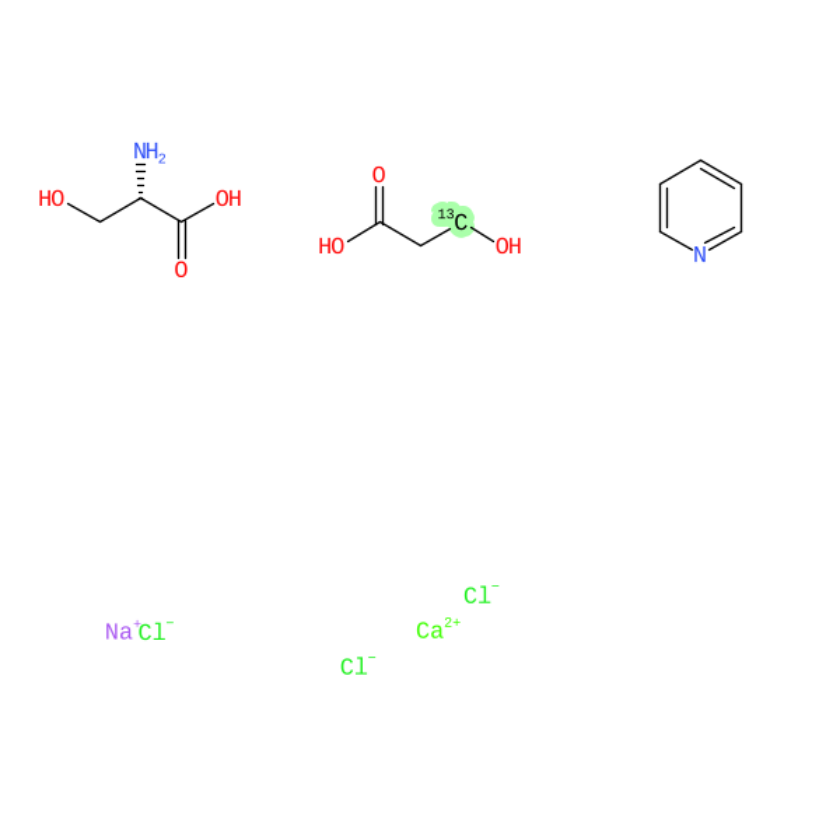

In [33]:
grobs_list=mols2grobs(mols, sma='[13C]') #C atom with mass 13
grid.arrange(grobs=grobs_list, nrow=2)

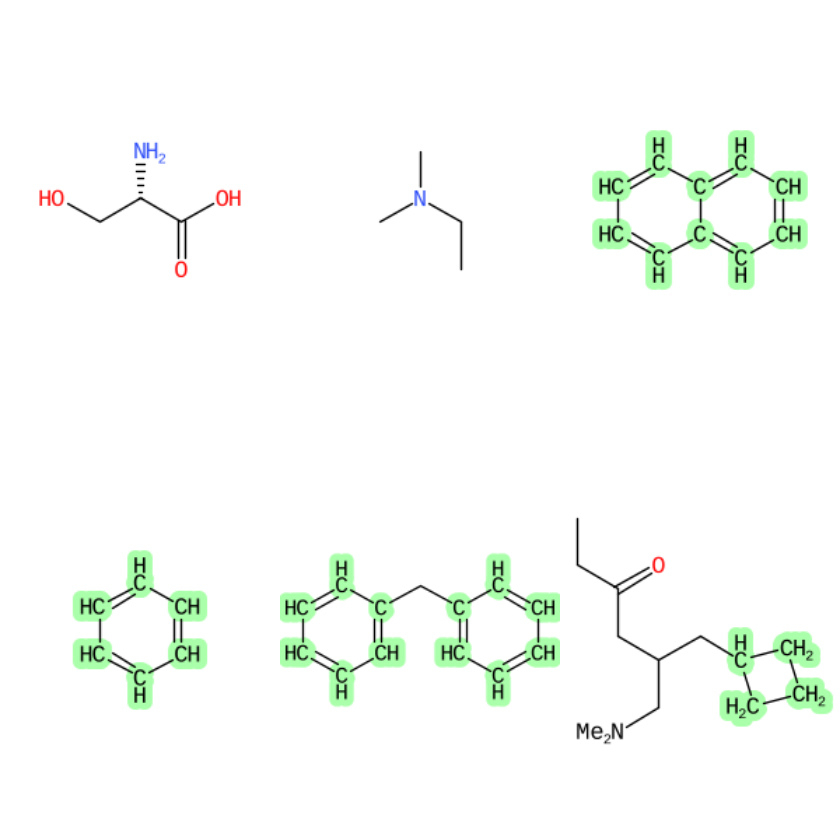

In [34]:
smiles = c('OC[C@@H](C(=O)O)N','CCN(C)(C)','c1ccc2ccccc2c1','c1ccccc1','c1ccccc1Cc1ccccc1','C1CCC1CC(CN(C)(C))CC(=O)CC')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma='[R]') # Atoms that are part of rings (Ring membership)
grid.arrange(grobs=grobs_list, ncol=3)

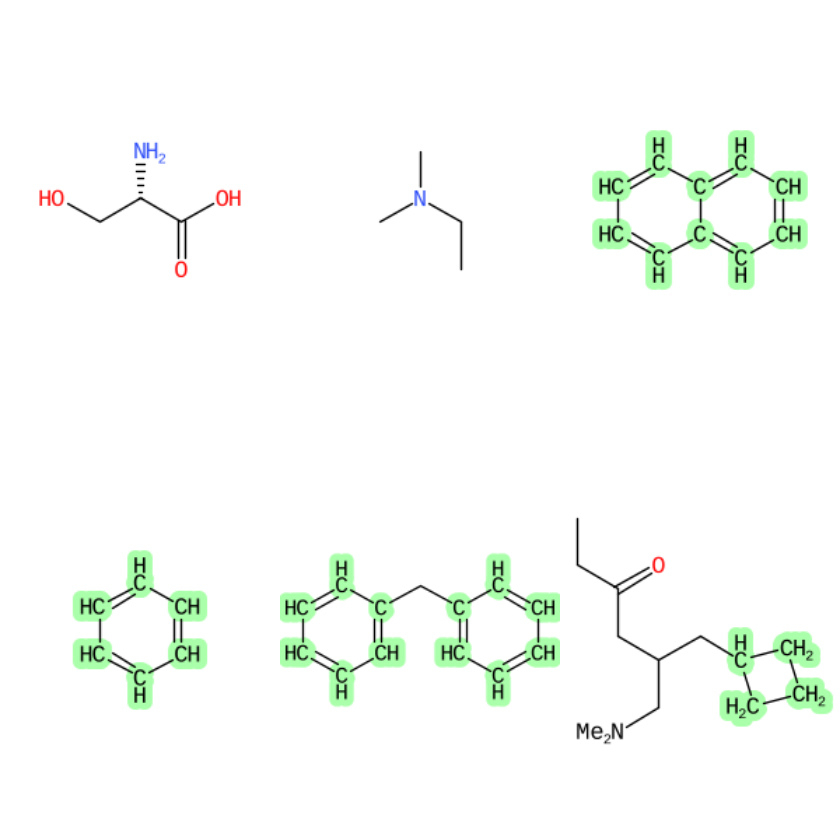

In [35]:
grobs_list=mols2grobs(mols, sma='[r]') # Atoms that are part of rings with any size (Ring membership)
grid.arrange(grobs=grobs_list, ncol=3)

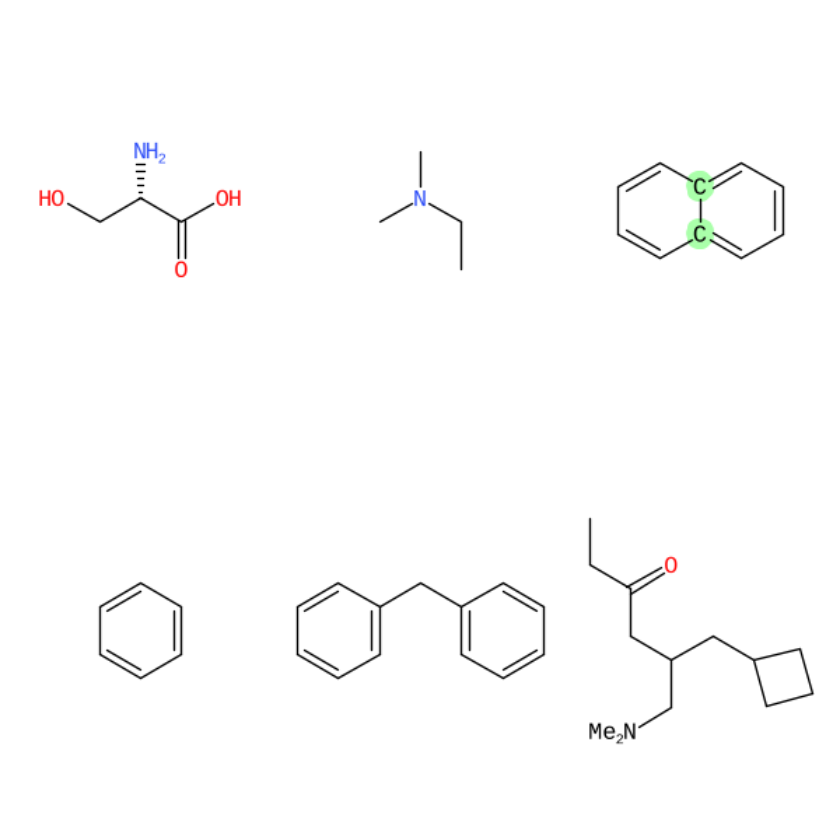

In [36]:
grobs_list=mols2grobs(mols, sma='[R2]') # Atoms that are part of 2 rings (Ring membership)
grid.arrange(grobs=grobs_list, ncol=3)

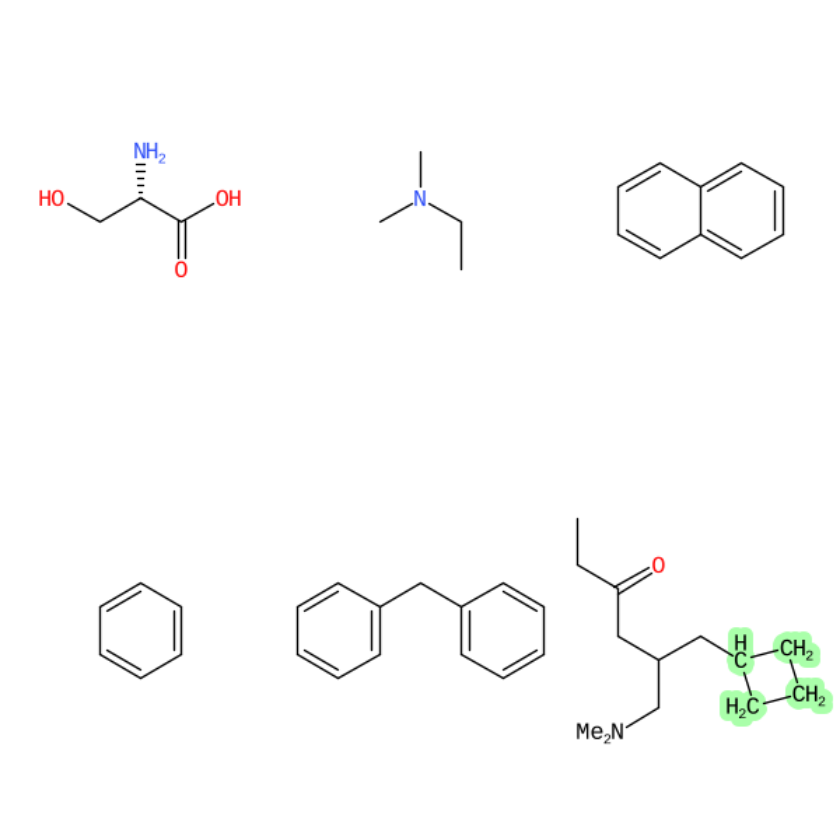

In [37]:
grobs_list=mols2grobs(mols, sma='[r4]') # Atoms that are part of ring with size 4
grid.arrange(grobs=grobs_list, ncol=3)

**Bonds**

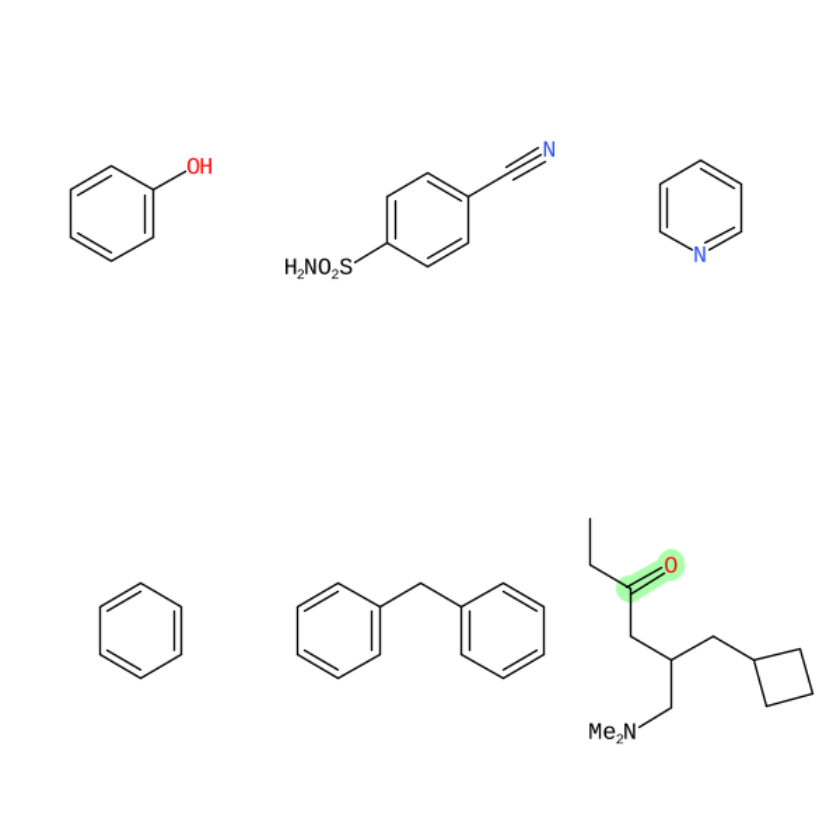

In [38]:
smiles = c('c1ccccc1O','NS(=O)(=O)c1ccc(cc1)C#N','c1cnccc1','c1ccccc1','c1ccccc1Cc1ccccc1','C1CCC1CC(CN(C)(C))CC(=O)CC')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma='C=O') # Double bond between C and O
grid.arrange(grobs=grobs_list, ncol=3)

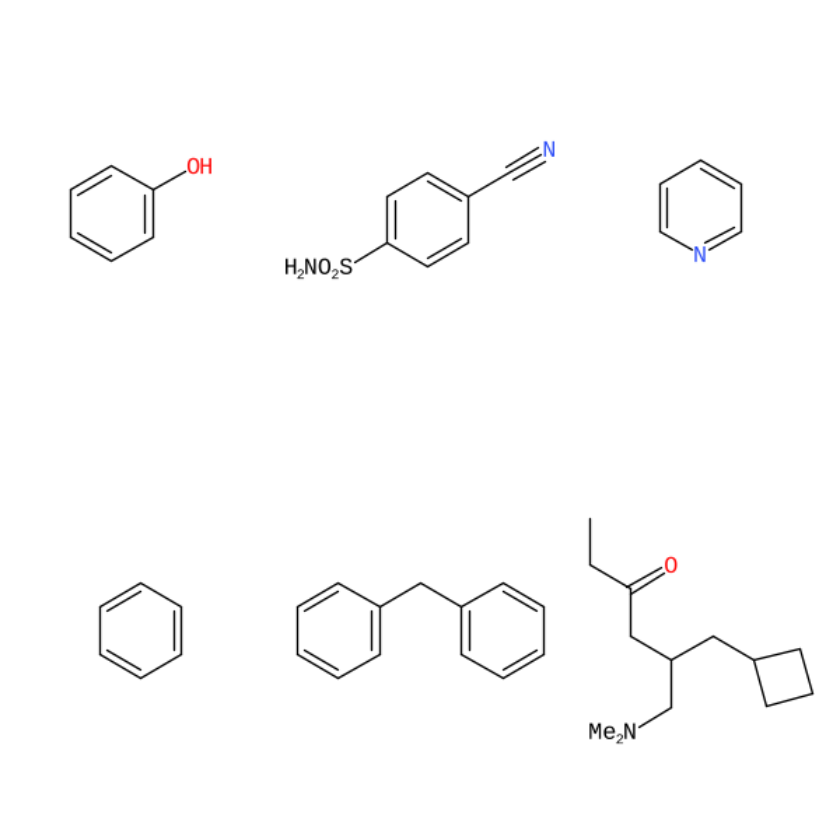

In [39]:
grobs_list=mols2grobs(mols, sma='C-O') # Single bond between C and O
grid.arrange(grobs=grobs_list, ncol=3)

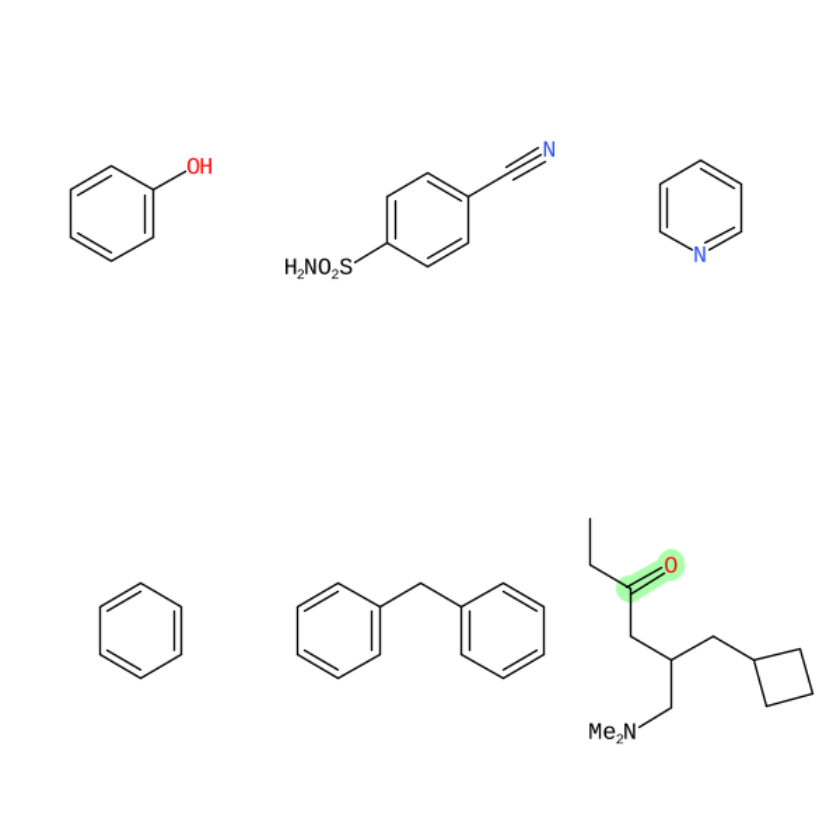

In [40]:
grobs_list=mols2grobs(mols, sma='C~O') # Any bond between C and O
grid.arrange(grobs=grobs_list, ncol=3)

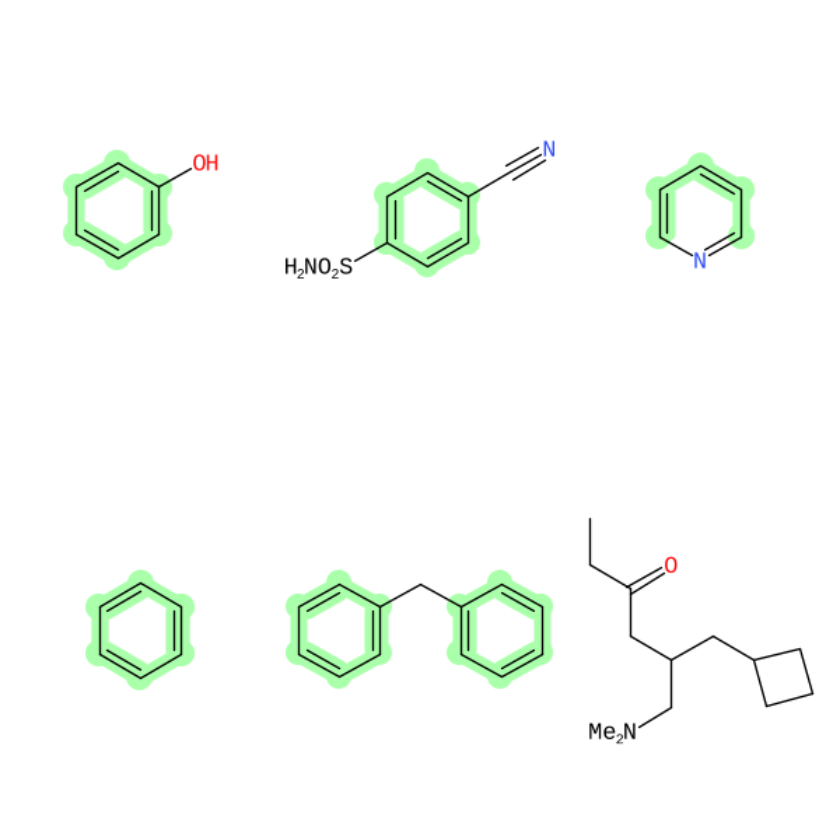

In [41]:
grobs_list=mols2grobs(mols, sma='c:c') # Aromatic bond between C and C
grid.arrange(grobs=grobs_list, ncol=3)

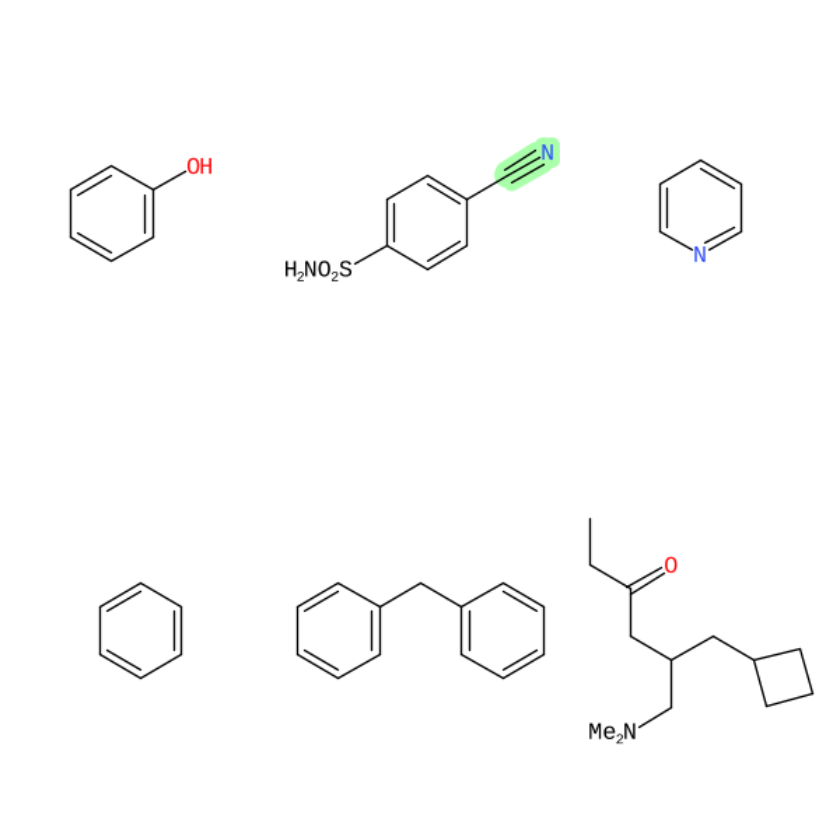

In [42]:
grobs_list=mols2grobs(mols, sma='*#*') # Triple bond between any two atoms
grid.arrange(grobs=grobs_list, ncol=3)

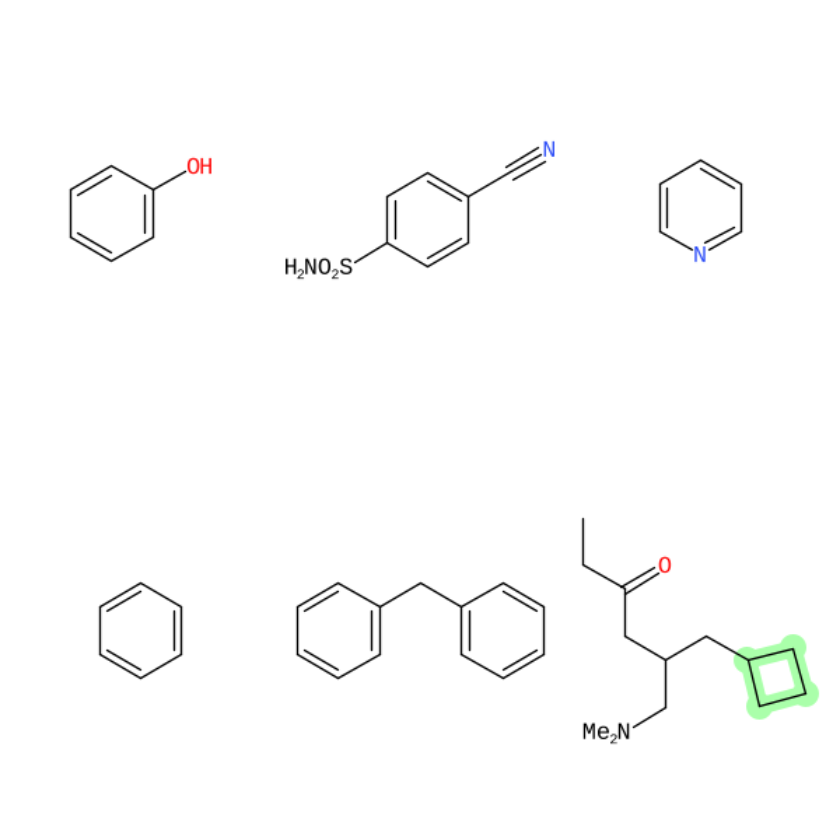

In [43]:
grobs_list=mols2grobs(mols, sma='C@C') # Ring bond between non-aramatic C atoms
grid.arrange(grobs=grobs_list, ncol=3)

**Logical operators**

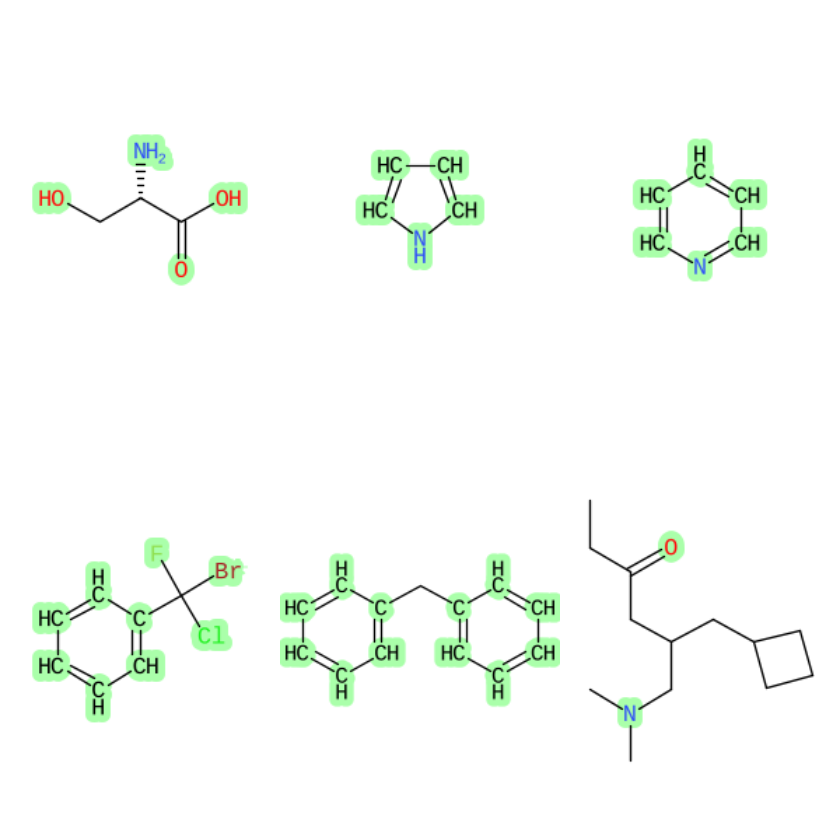

In [44]:
smiles = c('OC[C@@H](C(=O)O)N','c1cNcc1','c1cnccc1','ClC(Br)(F)c1ccccc1','c1ccccc1Cc1ccccc1','C1CCC1CC(CN(C)(C))CC(=O)CC')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma='[!C]') # Not aliphatic Corbon
grid.arrange(grobs=grobs_list, ncol=3)

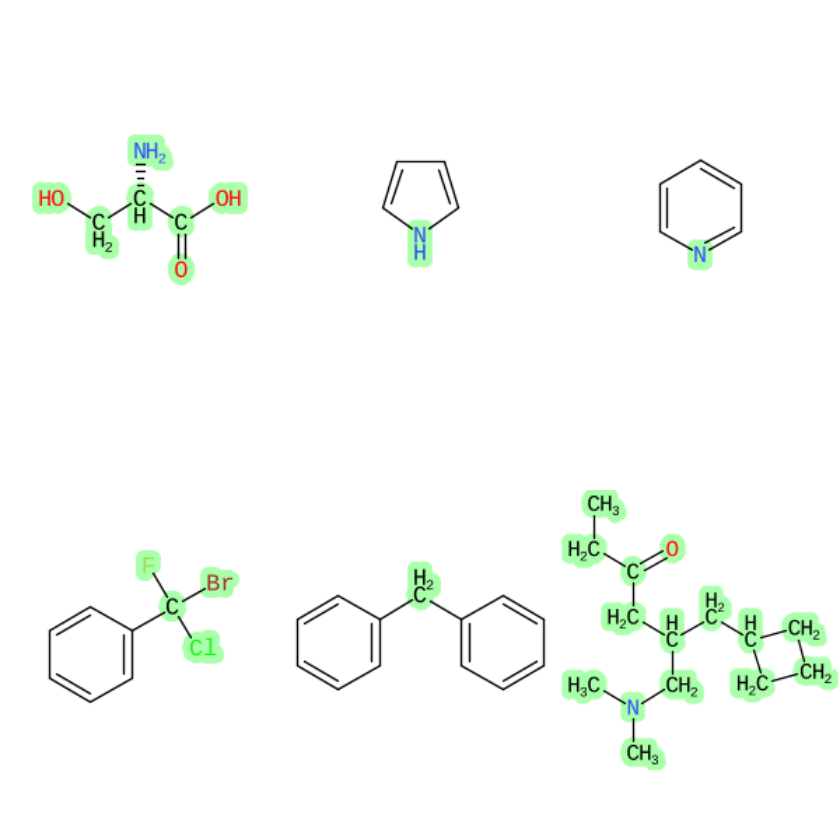

In [45]:
grobs_list=mols2grobs(mols, sma='[!c]') # Not aromatic Corbon
grid.arrange(grobs=grobs_list, ncol=3)

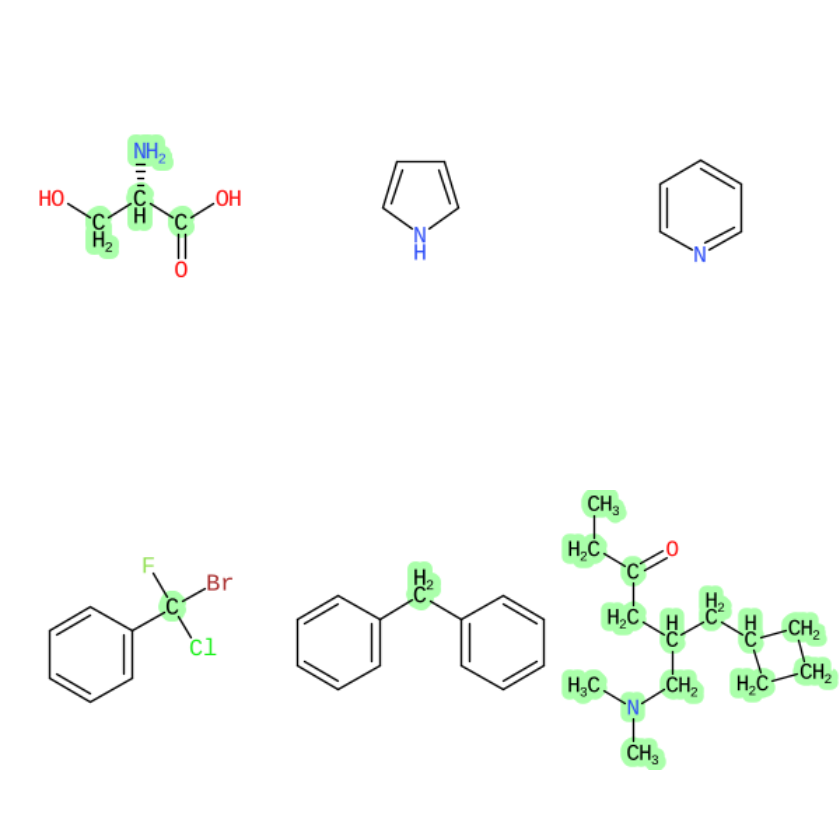

In [46]:
grobs_list=mols2grobs(mols, sma='[C,N]') # Aliphatic C or N
grid.arrange(grobs=grobs_list, ncol=3)

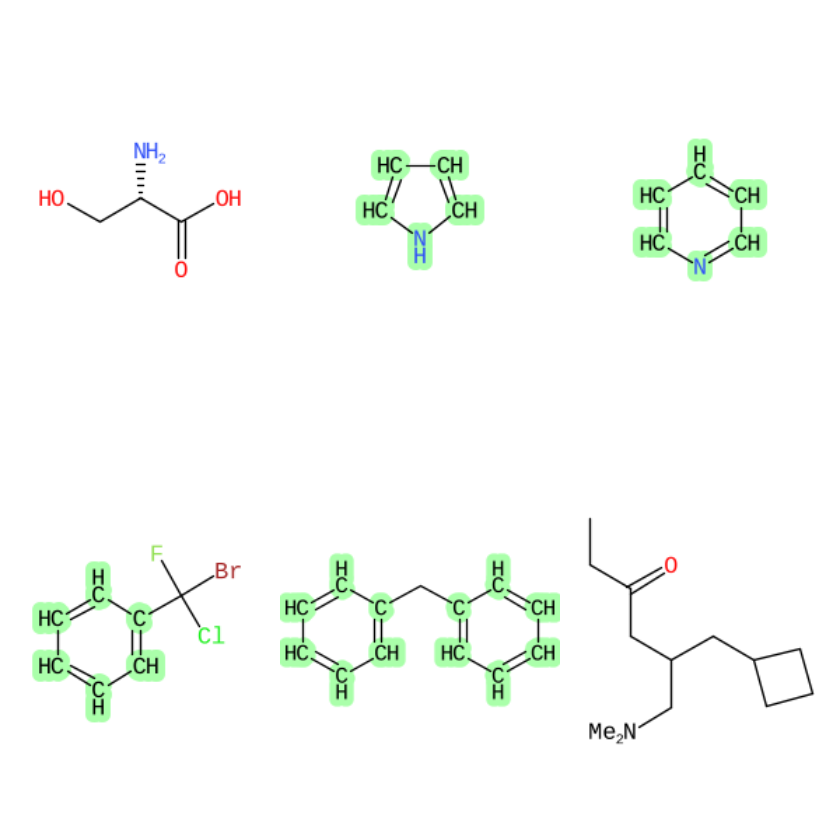

In [47]:
grobs_list=mols2grobs(mols, sma='[!C;R]') # NOT aliphatic carbon AND in ring
grid.arrange(grobs=grobs_list, ncol=3)

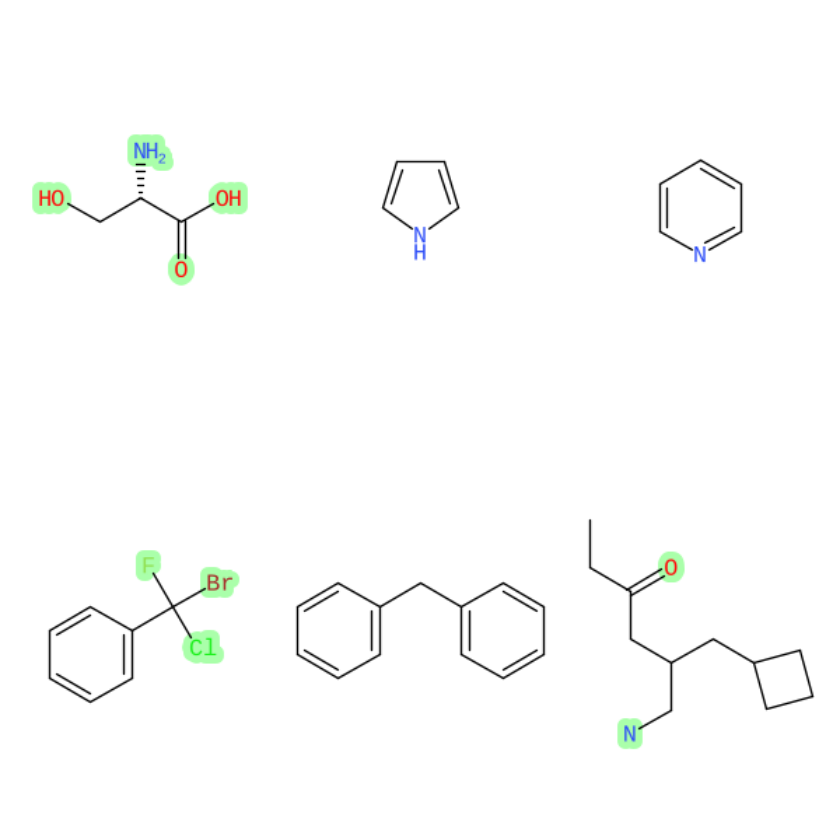

In [48]:
grobs_list=mols2grobs(mols, sma='[!C;R0]') # NOT an aliphatic carbon AND non-ring atom
grid.arrange(grobs=grobs_list, ncol=3)

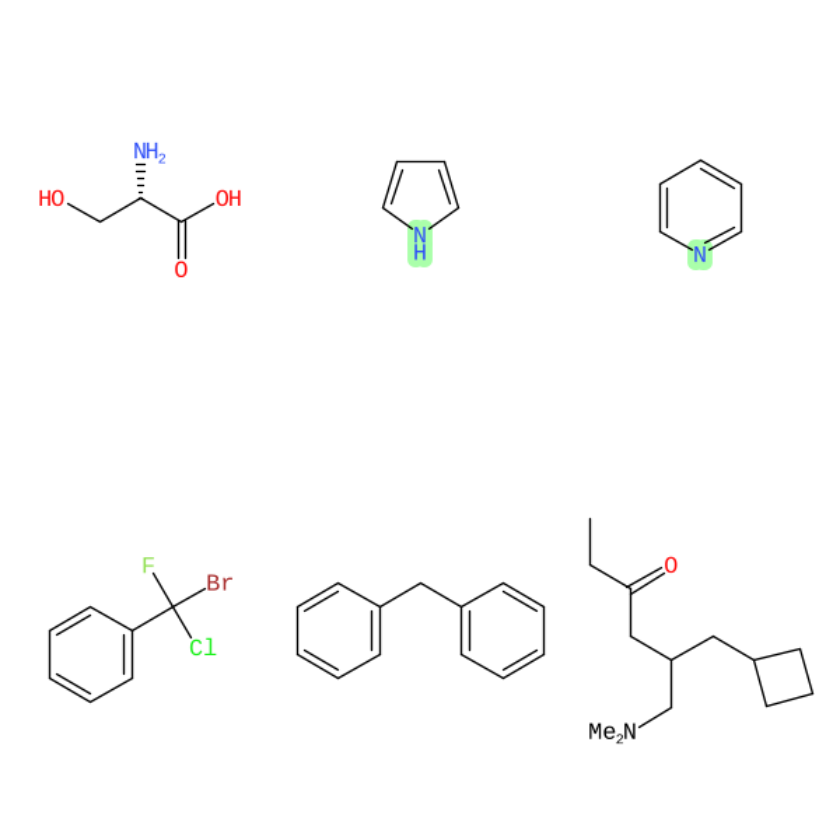

In [49]:
grobs_list=mols2grobs(mols, sma='[!C;!c;R]') # NOT an aliphatic carbon AND NOT an aromatic carbon AND ring atom
grid.arrange(grobs=grobs_list, ncol=3)

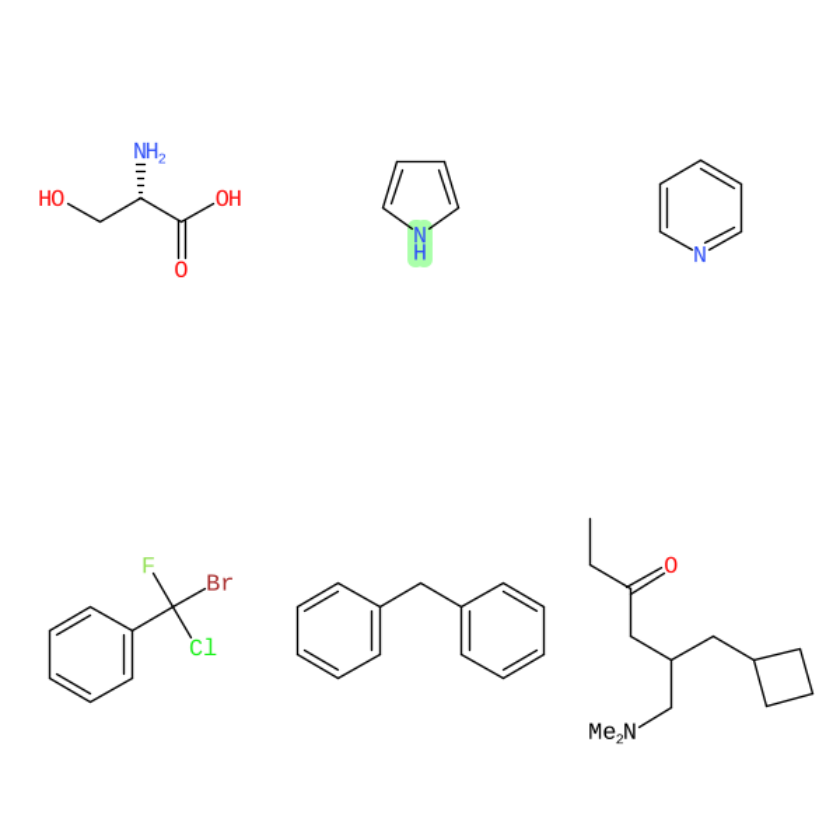

In [50]:
grobs_list=mols2grobs(mols, sma='[n&H1]') # Aromatic nitrogen with one hydrogen connection 
grid.arrange(grobs=grobs_list, ncol=3)

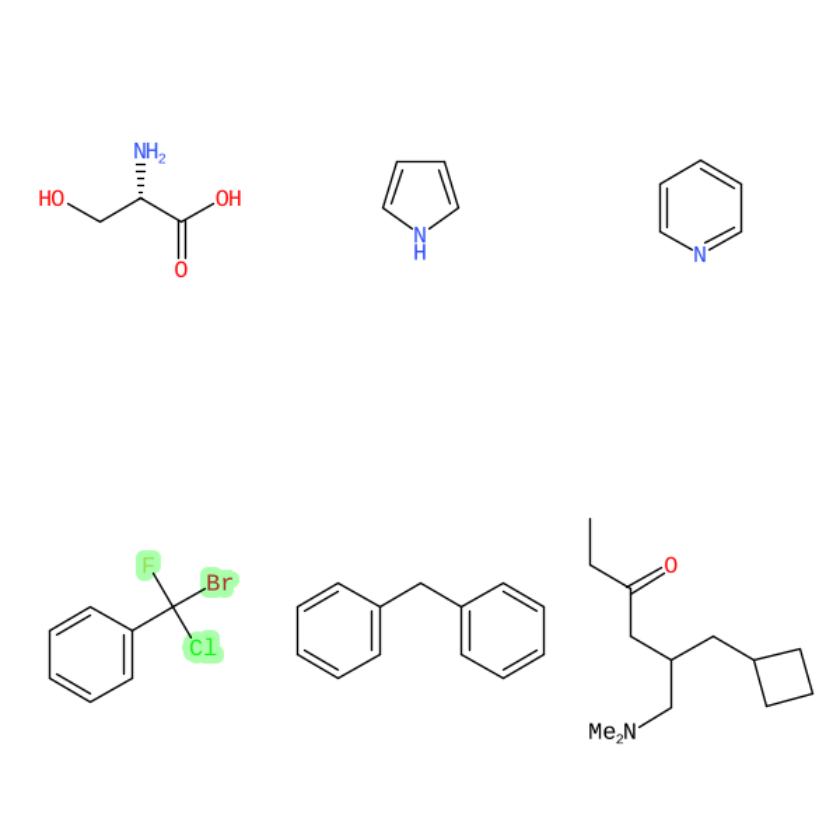

In [51]:
grobs_list=mols2grobs(mols, sma='[F,Cl,Br,I]') # Any structure with F OR Cl OR Br OR I
grid.arrange(grobs=grobs_list, ncol=3)

**Operator precedence**

In [52]:
2+2*3+1 # * has precedence than + i.e., first multiplication takes place then addition..

[1] 9

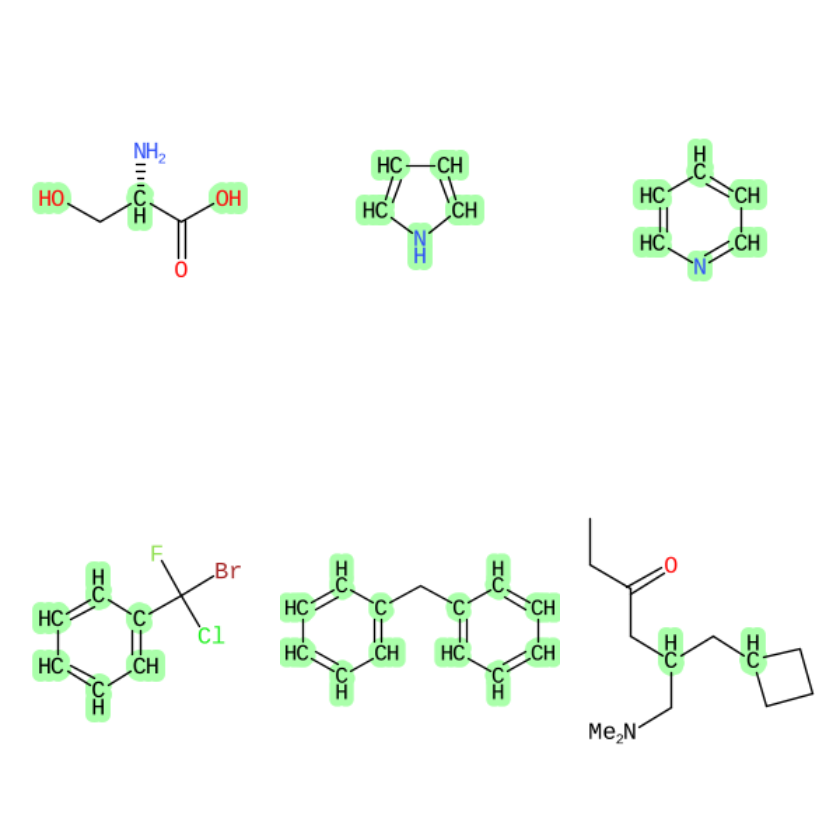

In [53]:
grobs_list=mols2grobs(mols, sma='[a&+0,*H1]') #  a atom AND are neutral (+0) OR any atom have 2 hydrogens. (& is deafault and has higher precedence)
grid.arrange(grobs=grobs_list, ncol=3)

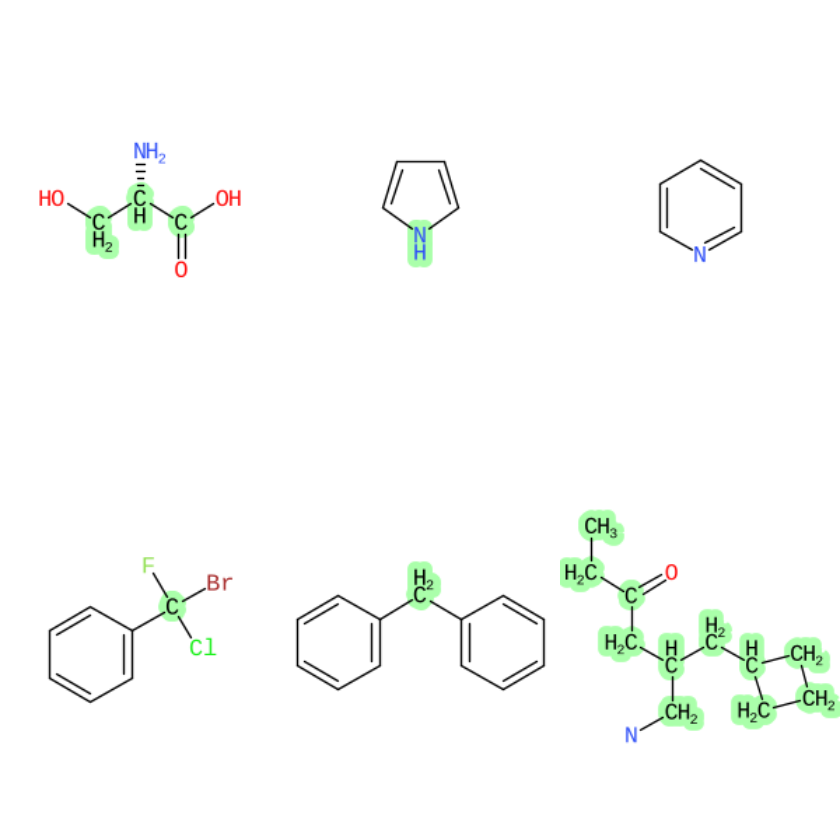

In [54]:
grobs_list=mols2grobs(mols, sma='[C,n&H1]') # Any aliphatic carbon OR (aromatic nitrogen  with one hydrogen connection) 
grid.arrange(grobs=grobs_list, ncol=3) # & High precedence

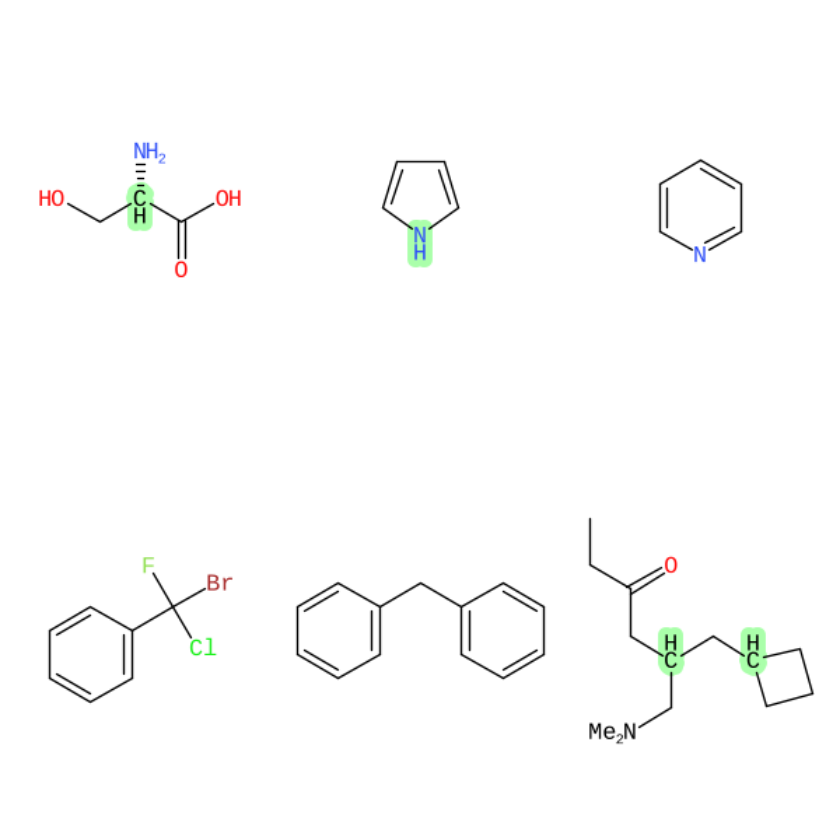

In [55]:
grobs_list=mols2grobs(mols, sma='[C,n;H1]') # Either aliphatic carbon OR aromatic nitrogen  with one hydrogen connection 
grid.arrange(grobs=grobs_list, ncol=3) # ; low precedence

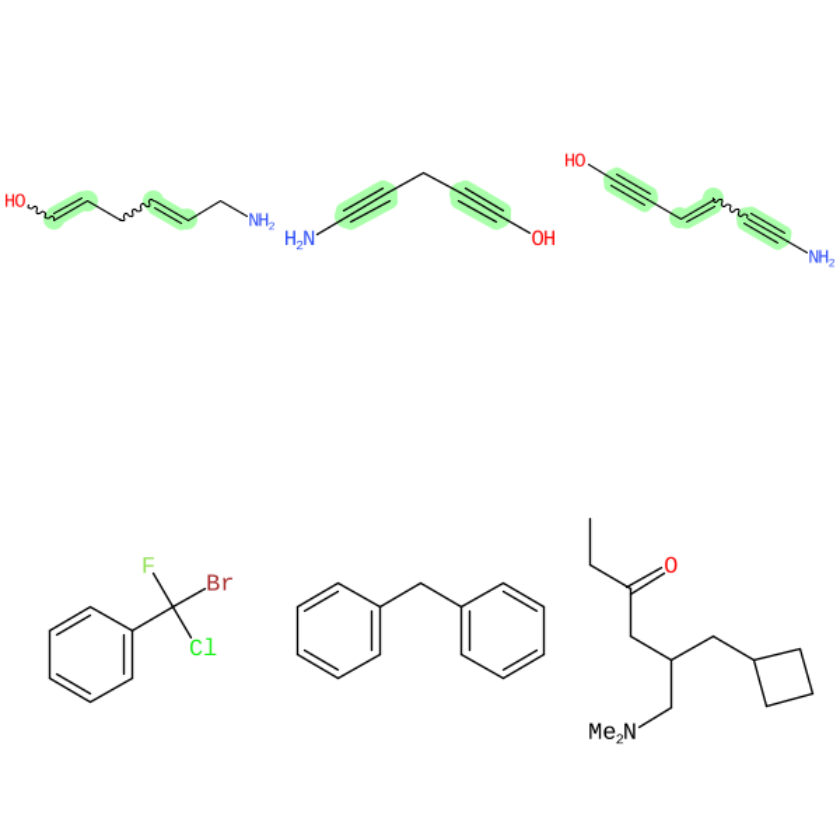

In [56]:
smiles = c('OC=CCC=CCN','OC#CCC#CN','NC#CC=CC#CO','ClC(Br)(F)c1ccccc1','c1ccccc1Cc1ccccc1','C1CCC1CC(CN(C)(C))CC(=O)CC')
mols = parse.smiles(smiles) #C=C
grobs_list=mols2grobs(mols, sma='[#6]#,=[#6]') # two carbons connected by a double or triple bond
grid.arrange(grobs=grobs_list, ncol=3) # means triple bond  #6 means C,c; C#C is triple bond between corbons

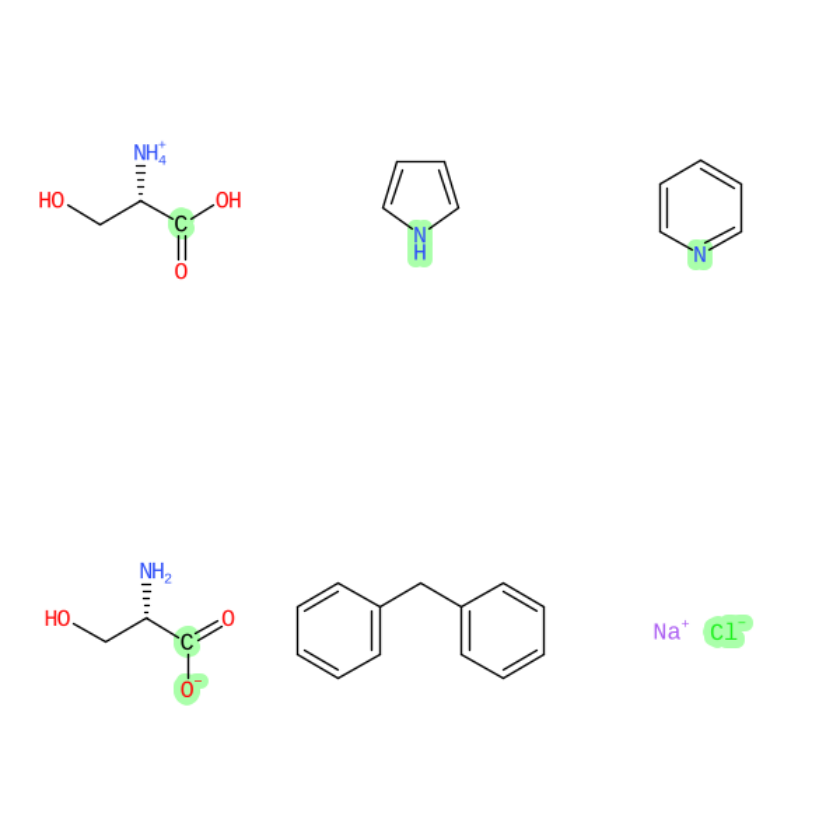

In [57]:
smiles = c('OC[C@@H](C(=O)O)[NH4+]','c1cNcc1','c1cnccc1','OC[C@@H](C(=O)[O-])N','c1ccccc1Cc1ccccc1','[Na+].[Cl-]')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma='[n,C&H0,-1]') # (Atoms that are n) or (Aliphatic Carbons AND zero H) OR (Ant atom positively charged) 
grid.arrange(grobs=grobs_list, ncol=3) # ";" is "AND" (High precedence) than , OR in above SMARTs notation

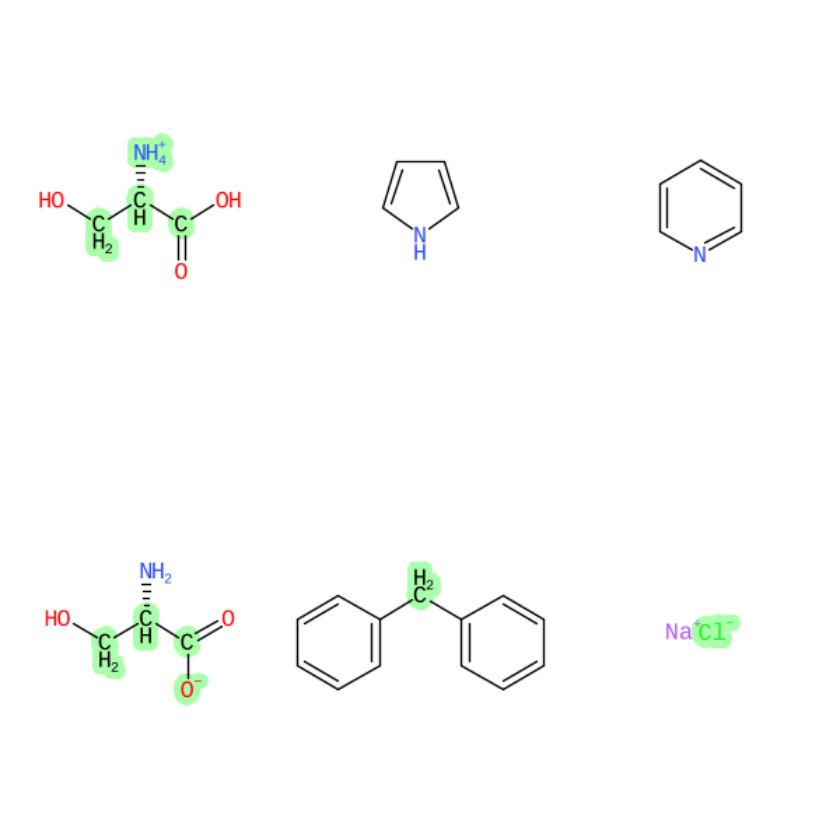

In [58]:
grobs_list=mols2grobs(mols, sma='[C,#7&+1,-1]') # Atoms that (are Nitrogens or are Oxygen and (are negatively or positively charged) 
grid.arrange(grobs=grobs_list, ncol=3) #  & (AND) has high precedence than , OR in above SMARTs notation

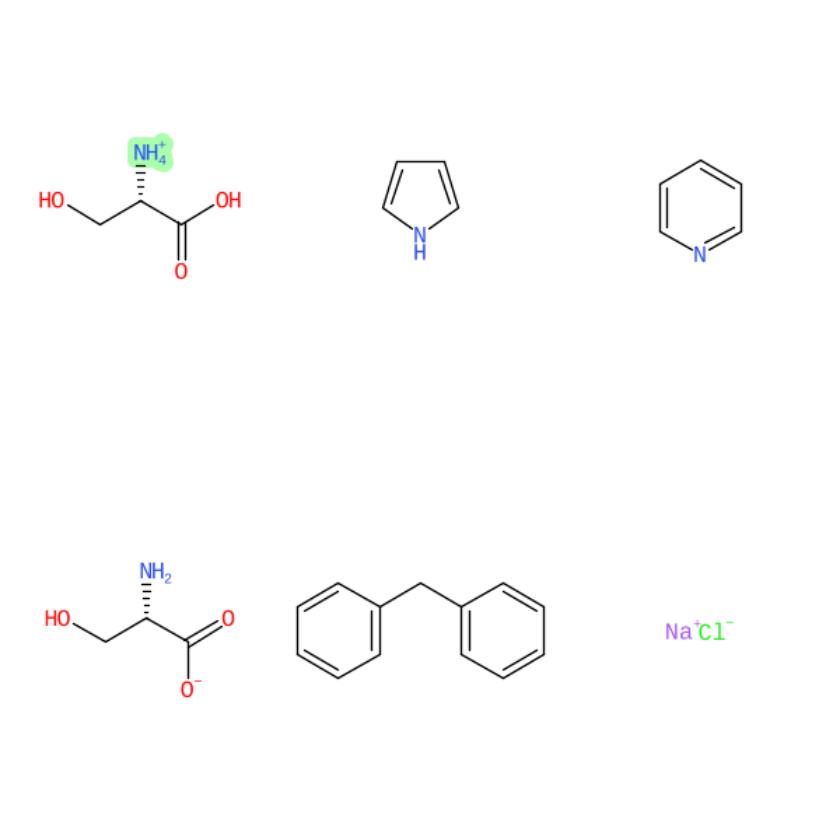

In [59]:
grobs_list=mols2grobs(mols, sma='[C,#7;+1,-1]') # (Atoms that are Nitrogens) or (Oxygen and are positively charged) or (Any atom with negative charge) 
grid.arrange(grobs=grobs_list, ncol=3) # ; (AND) (Low precedence) than , OR in above SMARTs notation

**Recursive SMARTS**

Allows detailed specification of an atom's environment. Any SMARTS expression may be used to define an atomic environment by writing a SMARTS starting with the atom of interest in this form: $(SMARTS)

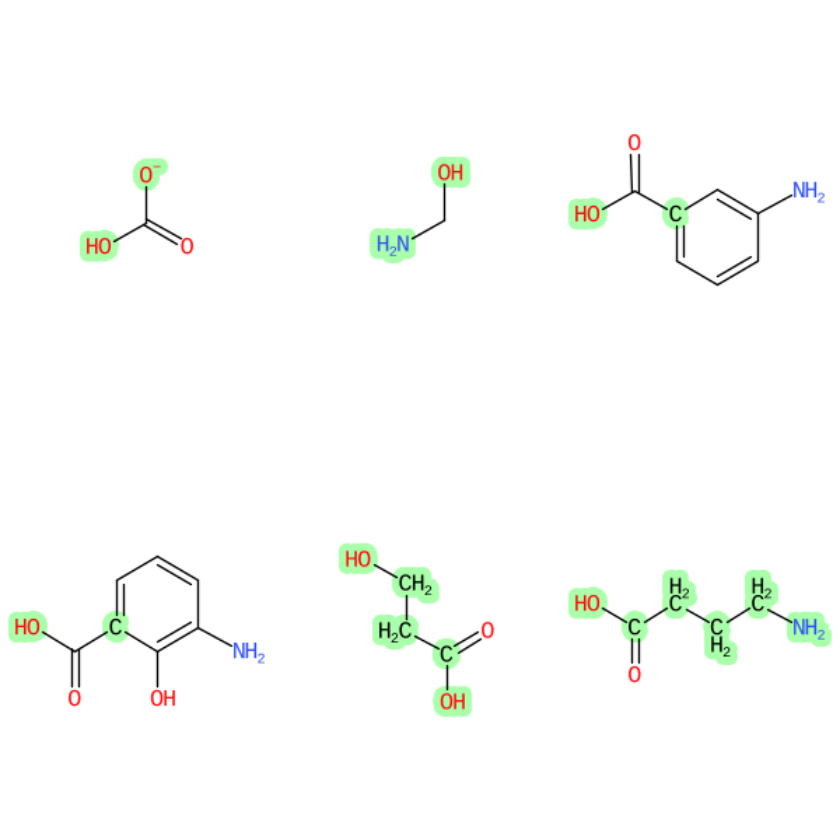

In [60]:
smiles = c('C(=O)(O)[O-]','NCO','OC(=O)c1cccc(N)c1','OC(=O)c1cccc(N)c1O', 'OC(=O)CCO','OC(=O)CCCN')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma='[$(*-C)]') # Atoms connected to Aliphatic corbon by single bond
grid.arrange(grobs=grobs_list, ncol=3)

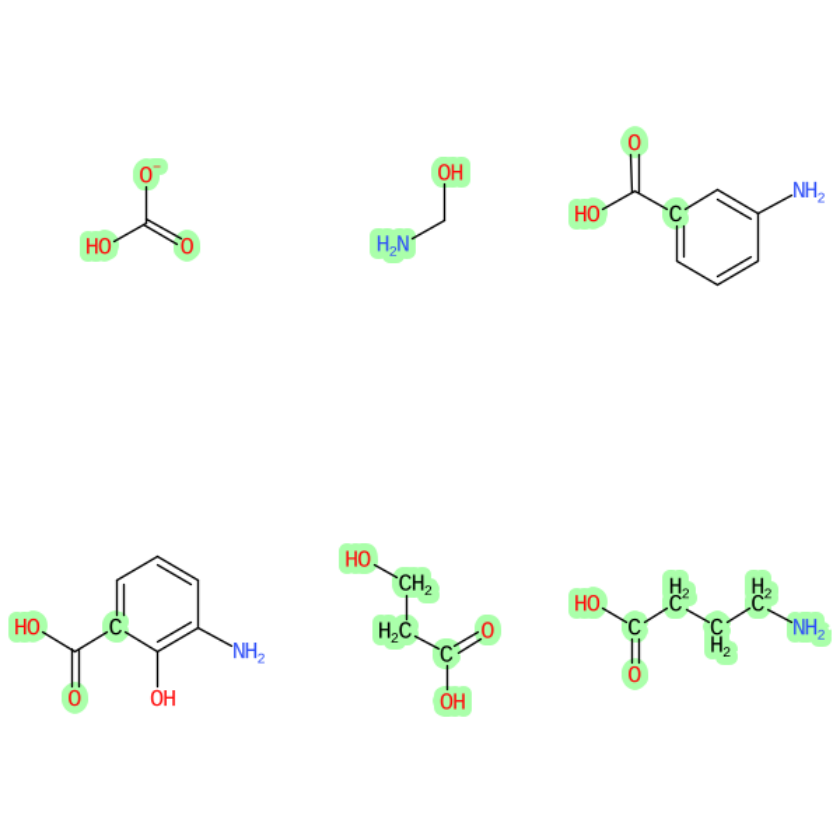

In [61]:
grobs_list=mols2grobs(mols, sma='[$(*~C)]') # Atoms connected to Aliphatic corbon by any bond
grid.arrange(grobs=grobs_list, ncol=3)

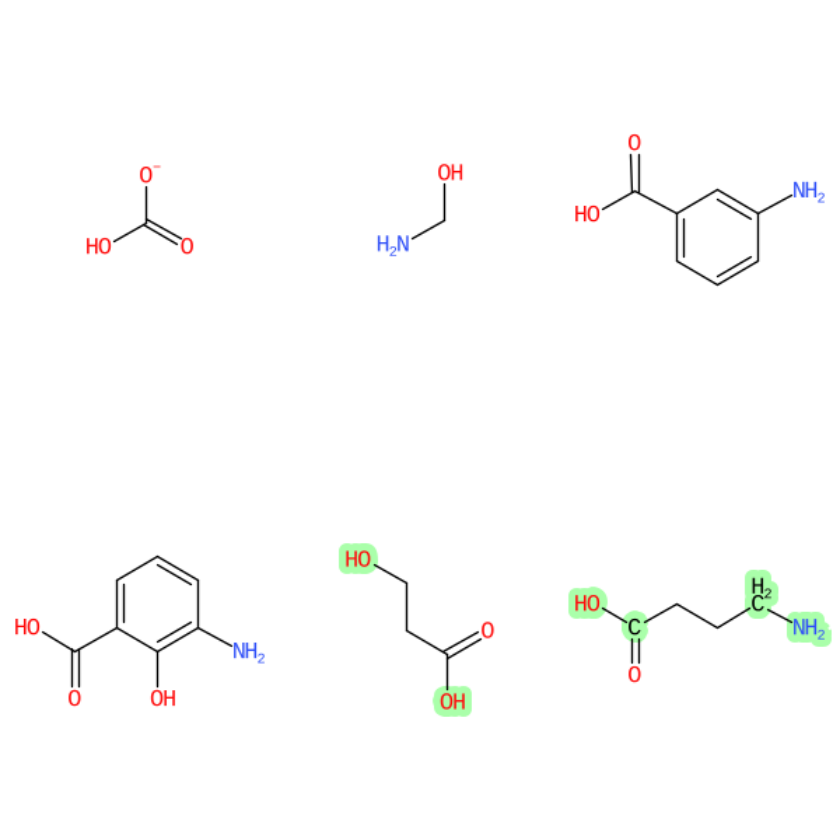

In [62]:
grobs_list=mols2grobs(mols, sma='[$(*CCC)]') # Atoms connected to CCC corbon chain
grid.arrange(grobs=grobs_list, ncol=3)

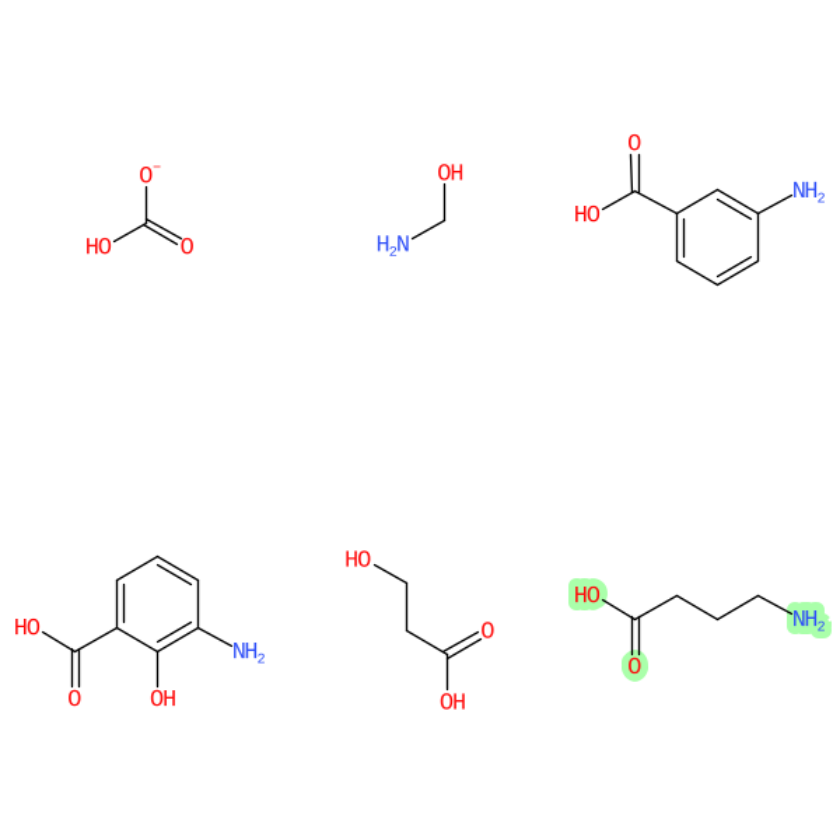

In [63]:
grobs_list=mols2grobs(mols, sma='[$(*~CCCC)]') # Atoms connected to CCC corbon chain
grid.arrange(grobs=grobs_list, ncol=3)

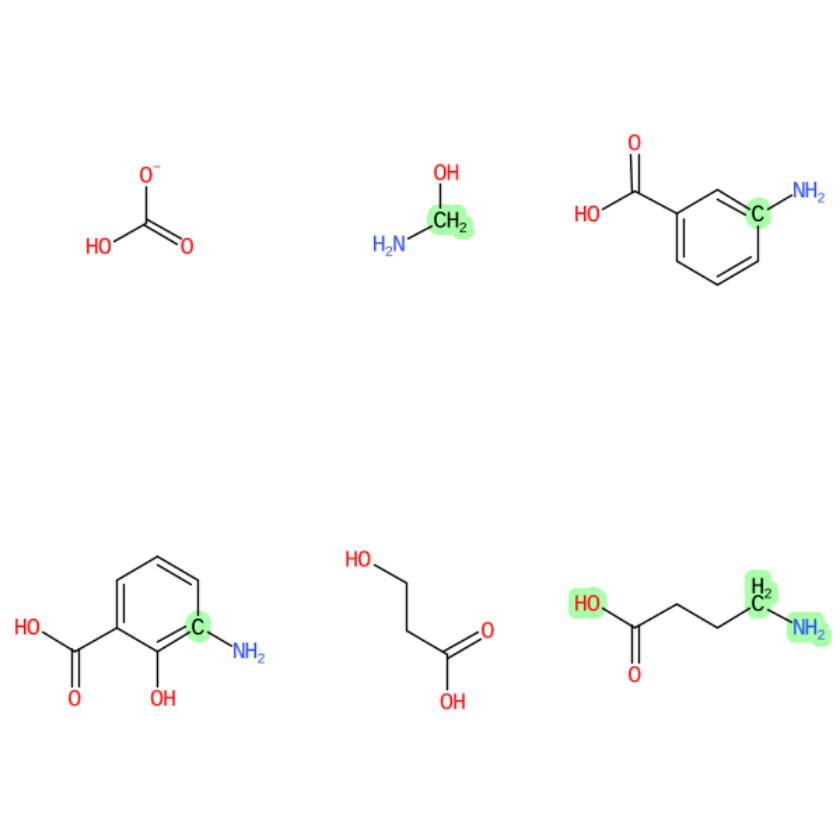

In [64]:
grobs_list=mols2grobs(mols, sma='[$(*N),$(*CCCC)]') # Atoms connected to Aliphatic corbon
grid.arrange(grobs=grobs_list, ncol=3)

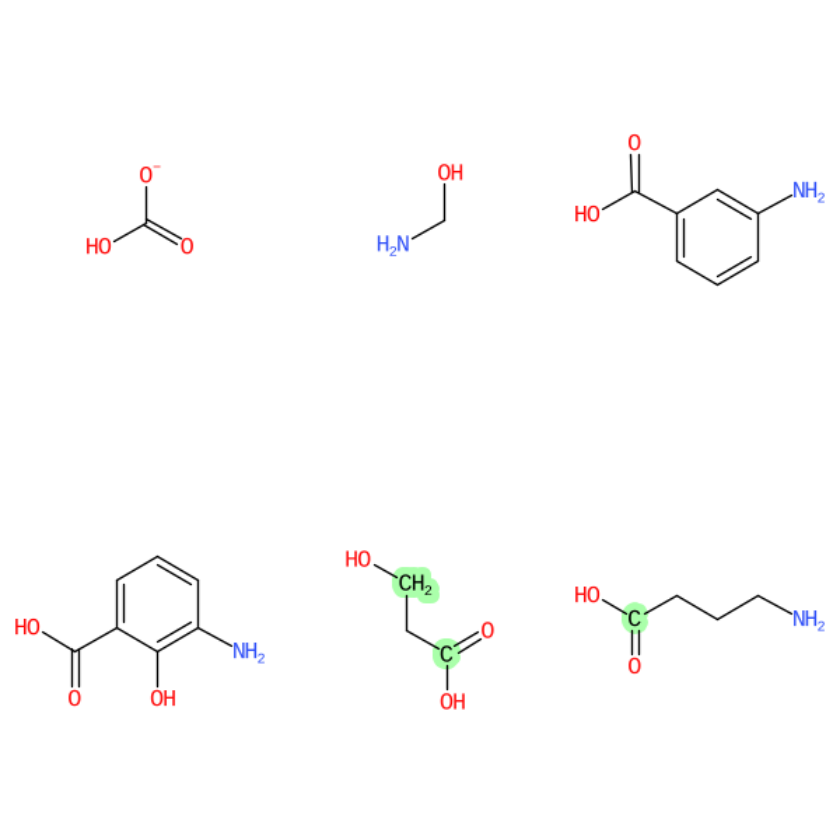

In [65]:
grobs_list=mols2grobs(mols, sma='[$(*C);$(*O)]') # Atoms connected to Aliphatic corbon and O
grid.arrange(grobs=grobs_list, ncol=3)

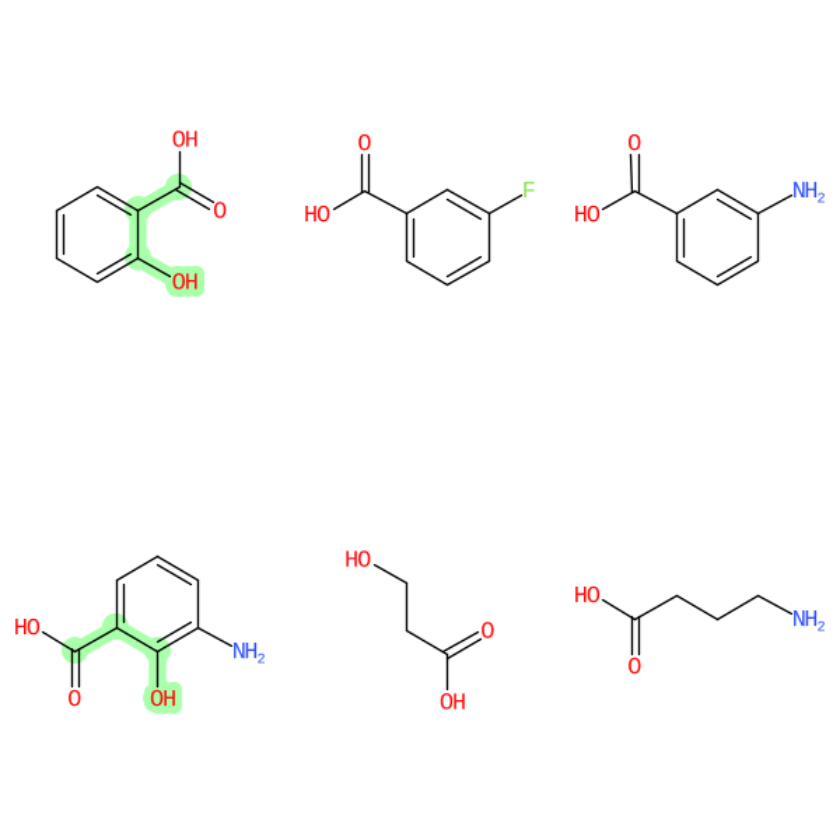

In [66]:
smiles = c('OC(=O)c1ccccc1O','OC(=O)c1cccc(F)c1','OC(=O)c1cccc(N)c1','OC(=O)c1cccc(N)c1O', 'OC(=O)CCO','OC(=O)CCCN')
mols = parse.smiles(smiles)

grobs_list=mols2grobs(mols, sma='CaaO') #  C ortho to O 
grid.arrange(grobs=grobs_list, ncol=3)

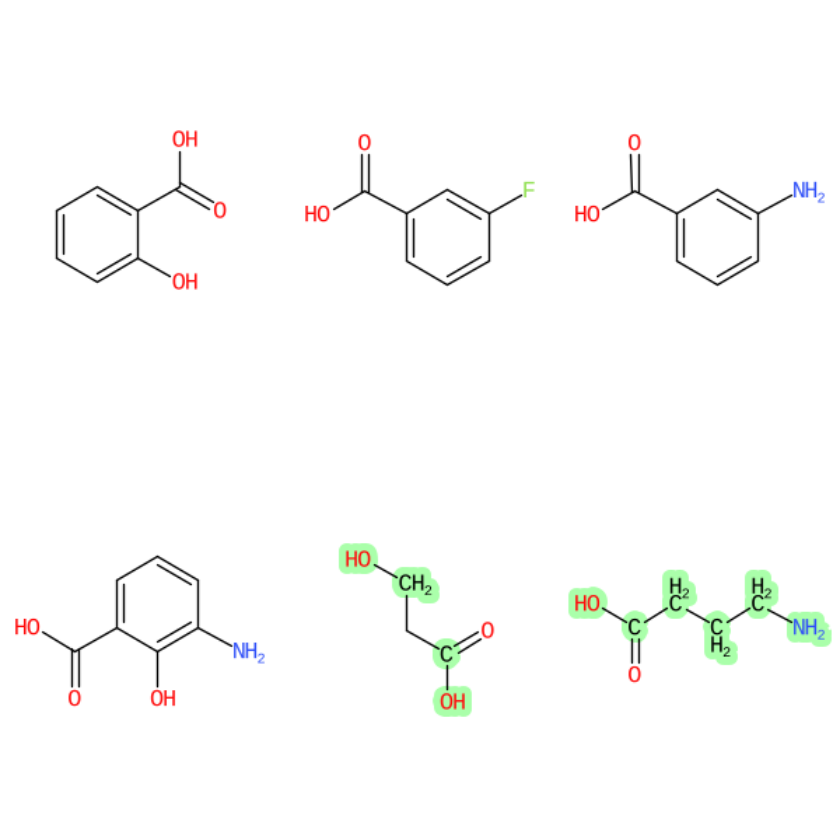

In [67]:
grobs_list=mols2grobs(mols, sma='[$(*C);$(*CC)]') # 
grid.arrange(grobs=grobs_list, ncol=3)

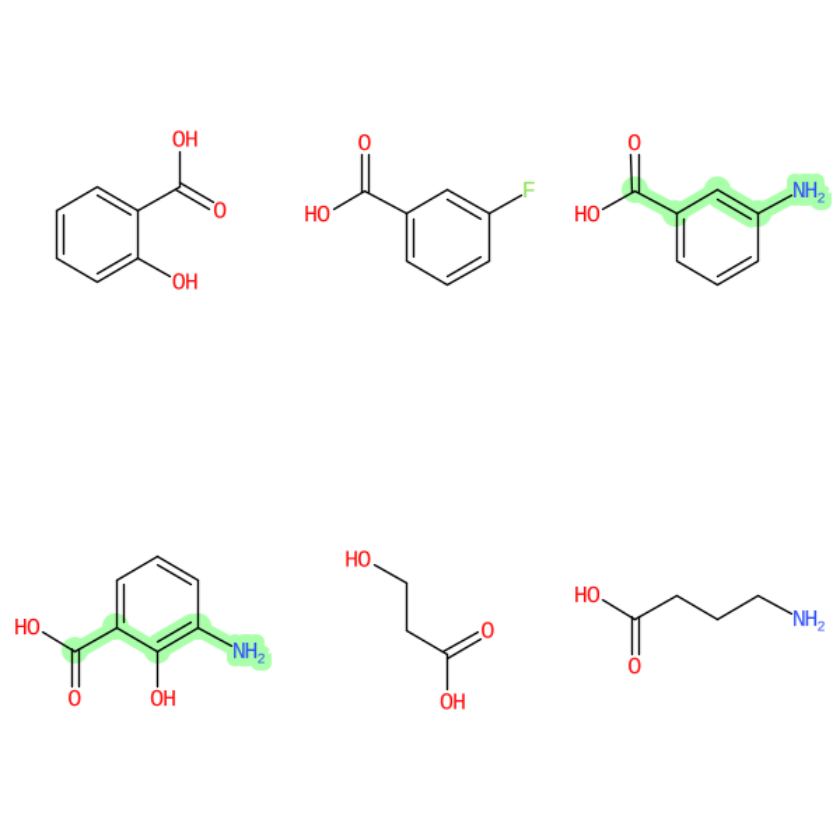

In [68]:
grobs_list=mols2grobs(mols, sma='CaaaN') # C meta to N
grid.arrange(grobs=grobs_list, ncol=3)

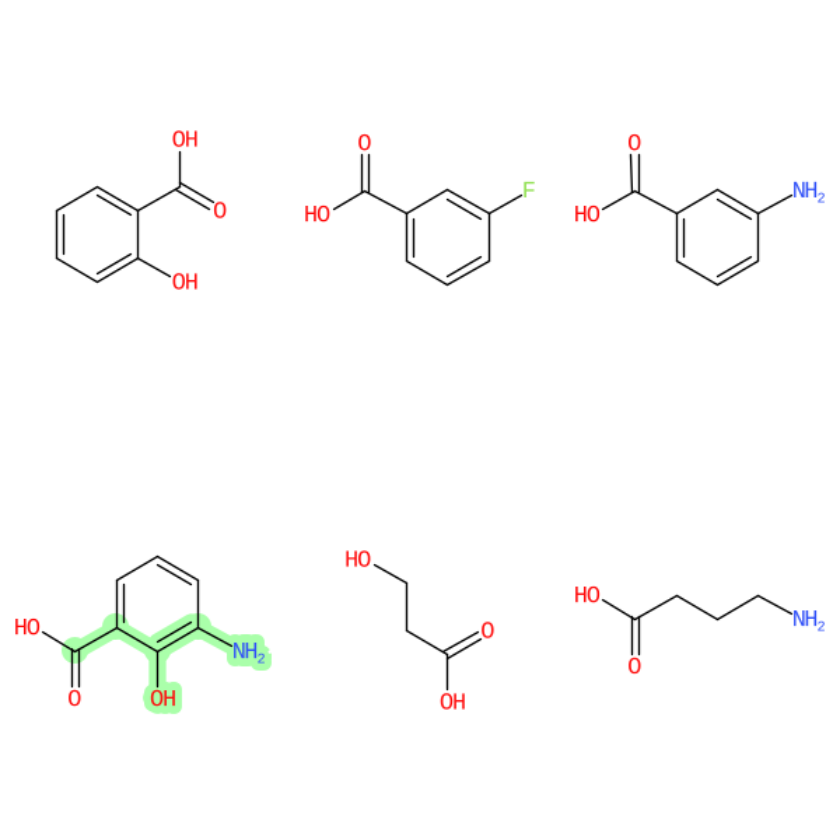

In [69]:
grobs_list=mols2grobs(mols, sma='Caa(O)aN') # C ortho to O and meta to N
grid.arrange(grobs=grobs_list, ncol=3)

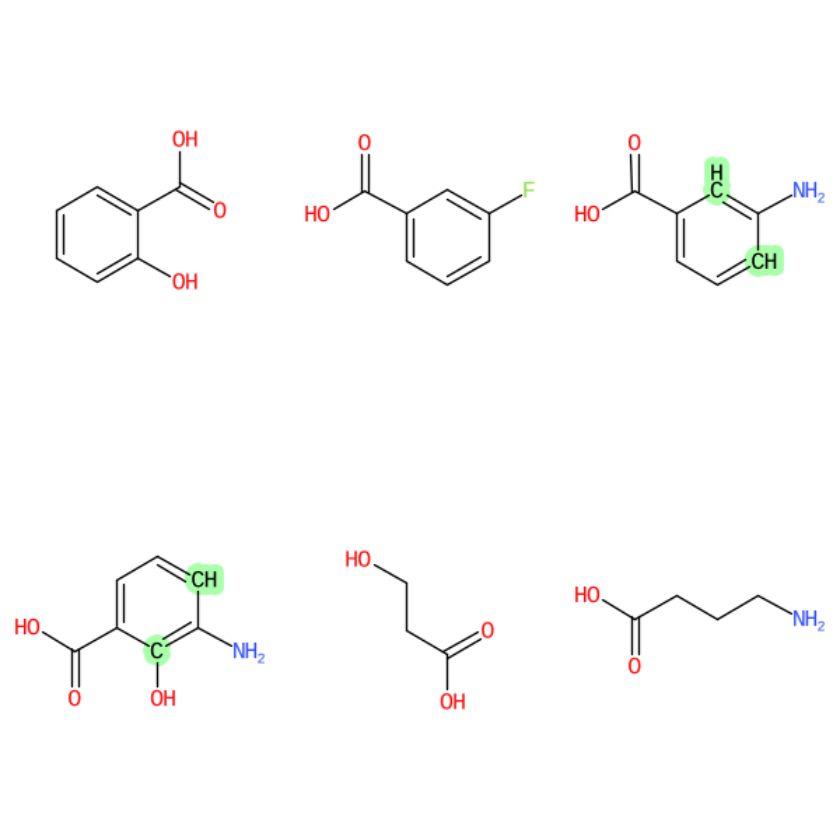

In [70]:
grobs_list=mols2grobs(mols, sma='[$(aaN)]') # Aromatic atom connected to aN
grid.arrange(grobs=grobs_list, ncol=3)

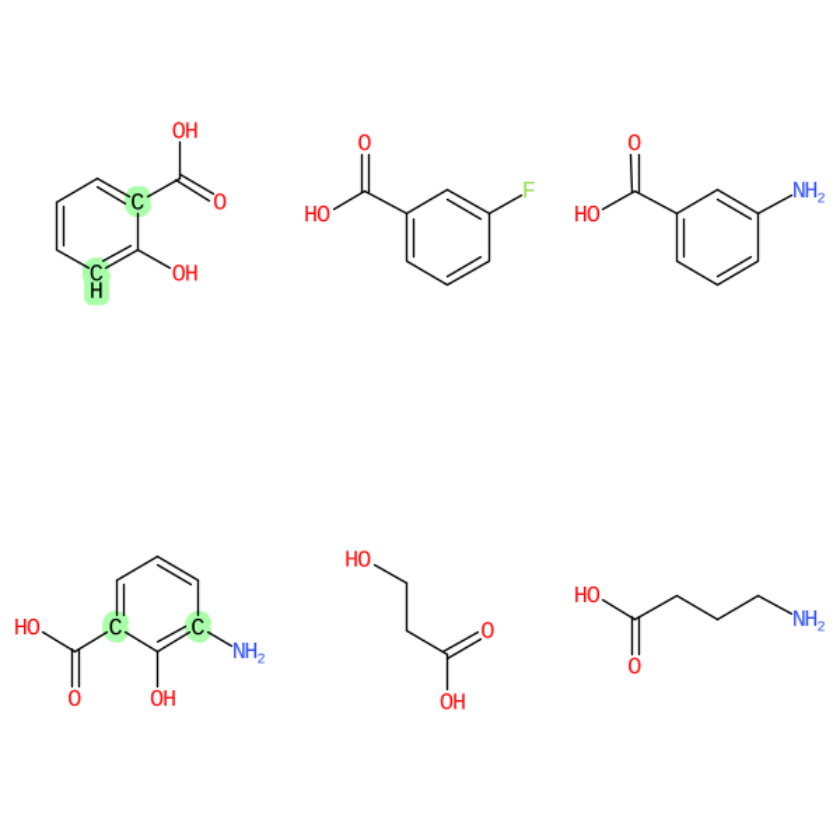

In [71]:
grobs_list=mols2grobs(mols, sma='[$(aaO)]') # Aromatic atom connected to ao 
grid.arrange(grobs=grobs_list, ncol=3)

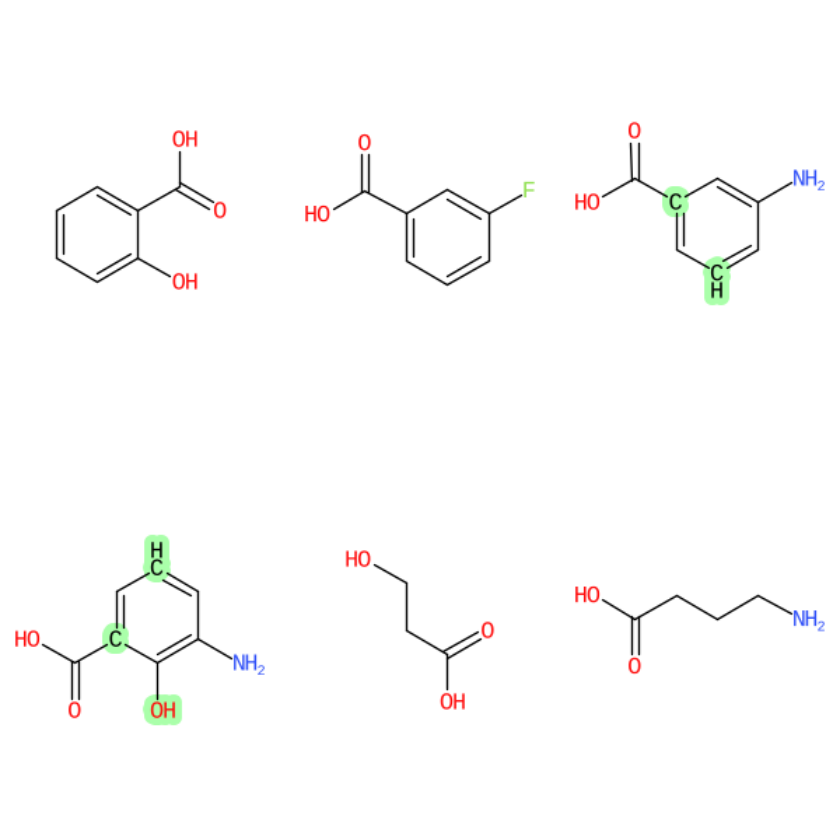

In [72]:
grobs_list=mols2grobs(mols, sma='[$(*aaN)]') # Any atom connected aaaN
grid.arrange(grobs=grobs_list, ncol=3)

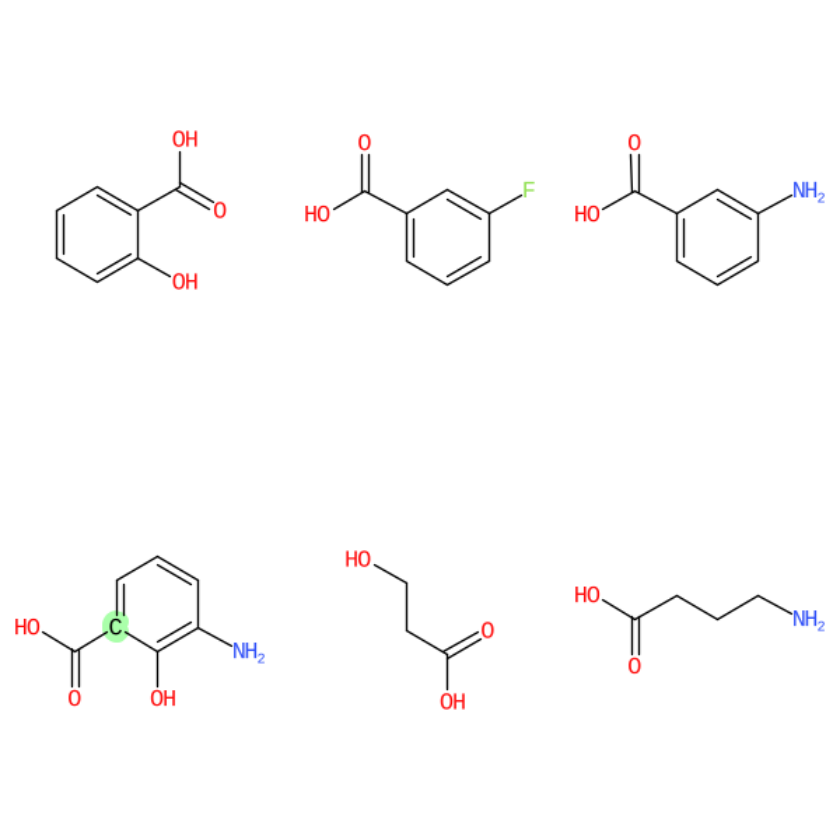

In [73]:
grobs_list=mols2grobs(mols, sma='[$(aaO);$(aaaN)]') # Aroamtic atom connected to ao and aaN
grid.arrange(grobs=grobs_list, ncol=3)

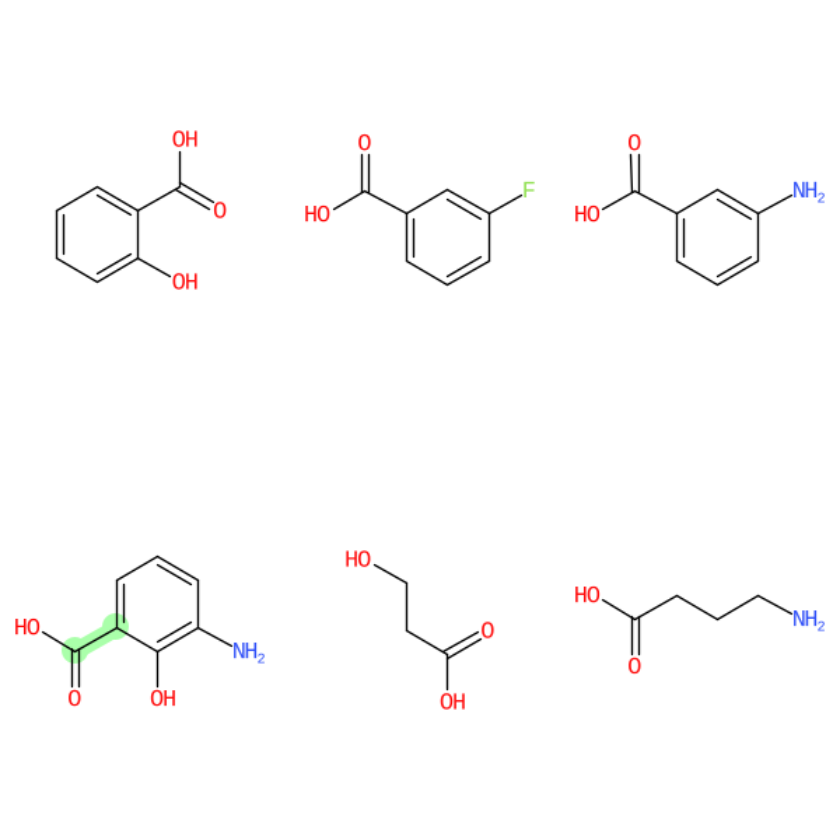

In [74]:
grobs_list=mols2grobs(mols, sma='C[$(a:aO);$(a:aaN)]') # C ortho to O and meta to N (all cases).
grid.arrange(grobs=grobs_list, ncol=3)

**Component level grouping**

In [75]:
install.packages("rcdk")
install.packages("gridExtra")

library(rcdk)
library(gridExtra)
mols2grobs<-function(mols_list, smarts){
library(grid)
if(missing(smarts)) { smarts='*' }
img_list = lapply(mols_list, function(x){view.image.2d(x, depictor=get.depictor(sma=smarts))})
lapply(img_list, function(x){rasterGrob(x)})
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



one of the following SMARTs notation will select a compound that has aromatic corbon and aliphatic corbon

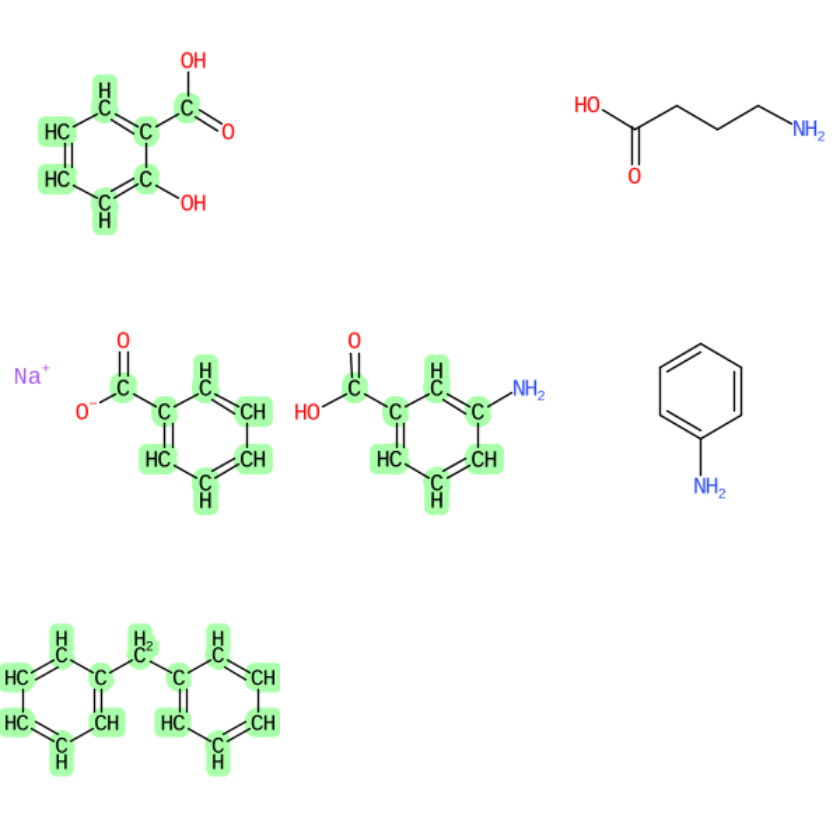

In [76]:
smiles = c('OC(=O)c1ccccc1O','','NCCCC(=O)O','c1ccccc1C(=O)[O-].[Na+]','OC(=O)c1cccc(N)c1','c1ccccc1N', 'c1ccccc1Cc1ccccc1')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma=('C.c')) #  Both carbons in the query match the same component
grid.arrange(grobs=grobs_list, ncol=3)

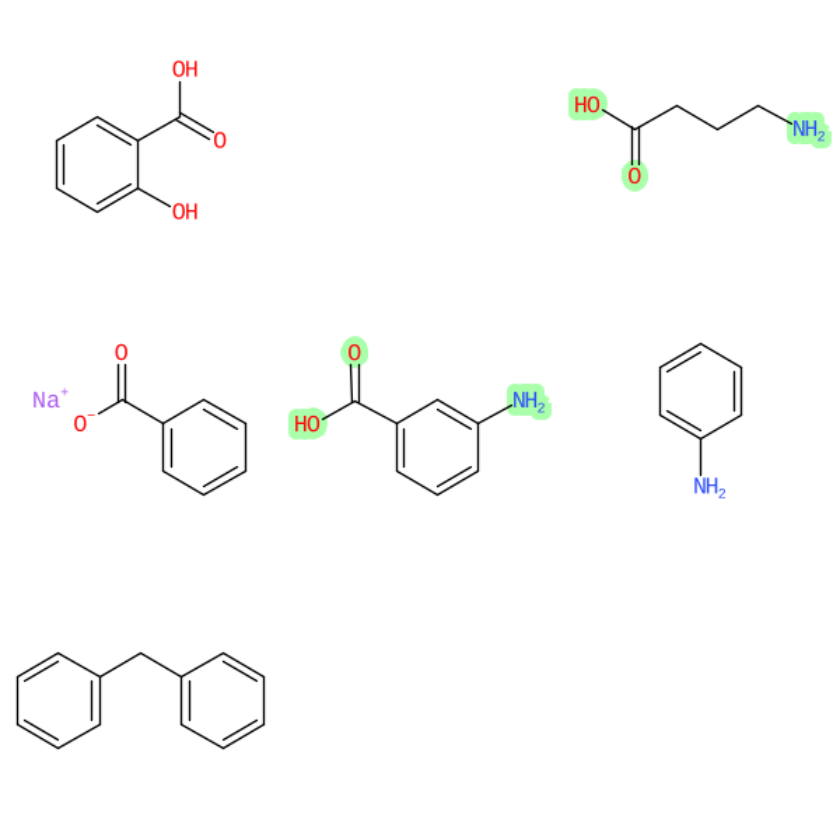

In [77]:
grobs_list=mols2grobs(mols, sma='(O.N)') #  Both atoms (O,N) in the query match the same component
grid.arrange(grobs=grobs_list, ncol=3)

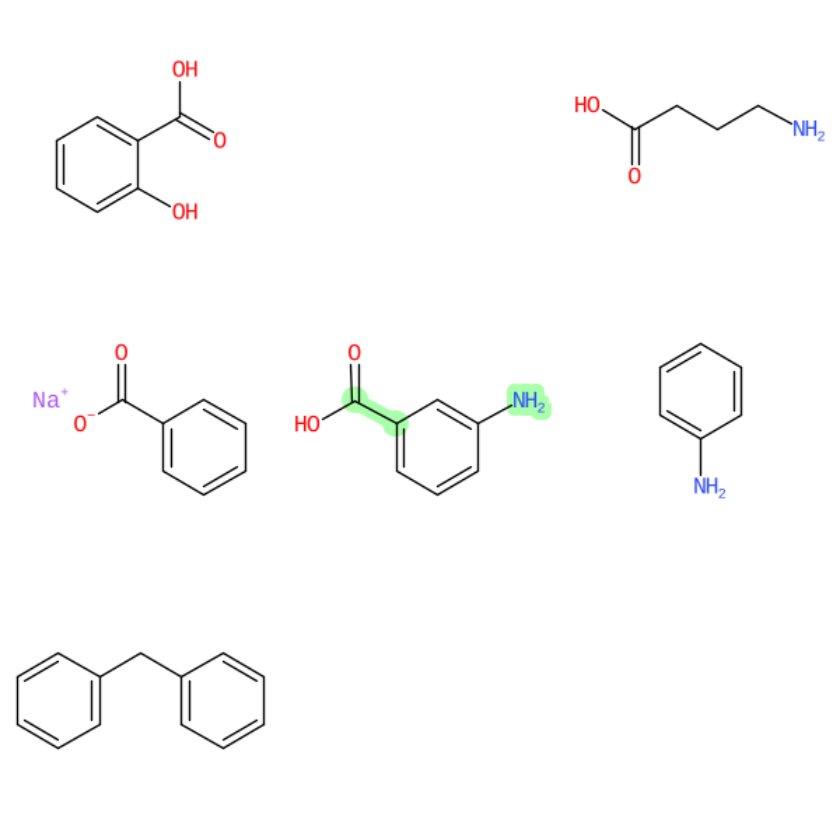

In [78]:
grobs_list=mols2grobs(mols, sma='cC.N') #  Both atoms (O,N) in the query match the same component
grid.arrange(grobs=grobs_list, ncol=3)

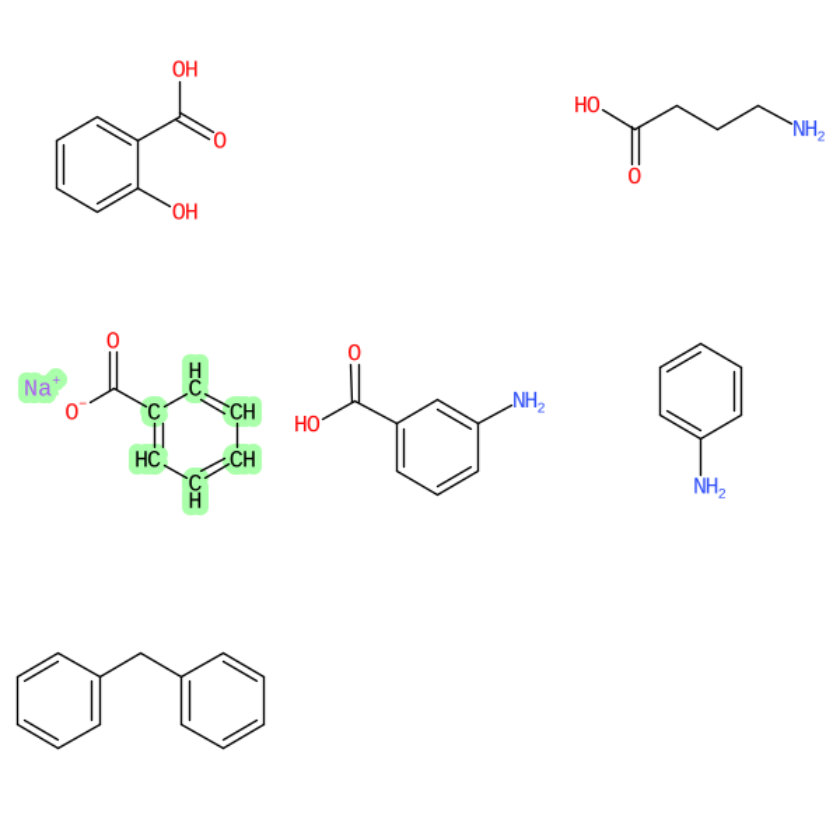

In [79]:
grobs_list=mols2grobs(mols, sma='c.[Na+]') #  Both atoms (c,Na+) in the query match the different components
grid.arrange(grobs=grobs_list, ncol=3)

Lipinski Rule of 5  https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five

1. No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)

2. No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)

3. A molecular mass less than 500 daltons

4. An octanol-water partition coefficient[6] (log P) that does not exceed 5

The definitions of hydrogen bond donors and acceptors used to apply Lipinski's Rule of Five are easily coded in SMARTS. Donors are defined as nitrogen or oxygen atoms that have at least one directly bonded hydrogen atom. Acceptors are Nitrogen and Oxygen atoms


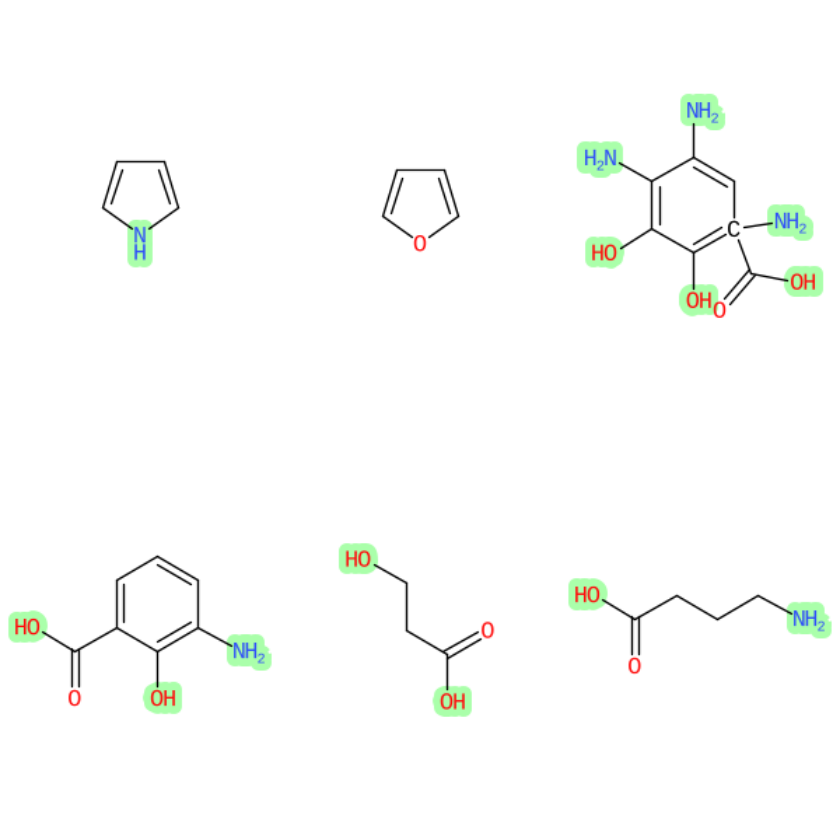

In [80]:
smiles = c('c1cccN1','c1ccoc1','OC(=O)c1(N)c(O)c(O)c(N)c(N)c1','OC(=O)c1cccc(N)c1O', 'OC(=O)CCO','OC(=O)CCCN')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma='[N,n,O;!H0]') #  N,n,O atoms with atleast 1 hydrogen atom (aromatic oxygen cannot have a bonded hydrogen)
grid.arrange(grobs=grobs_list, ncol=3)

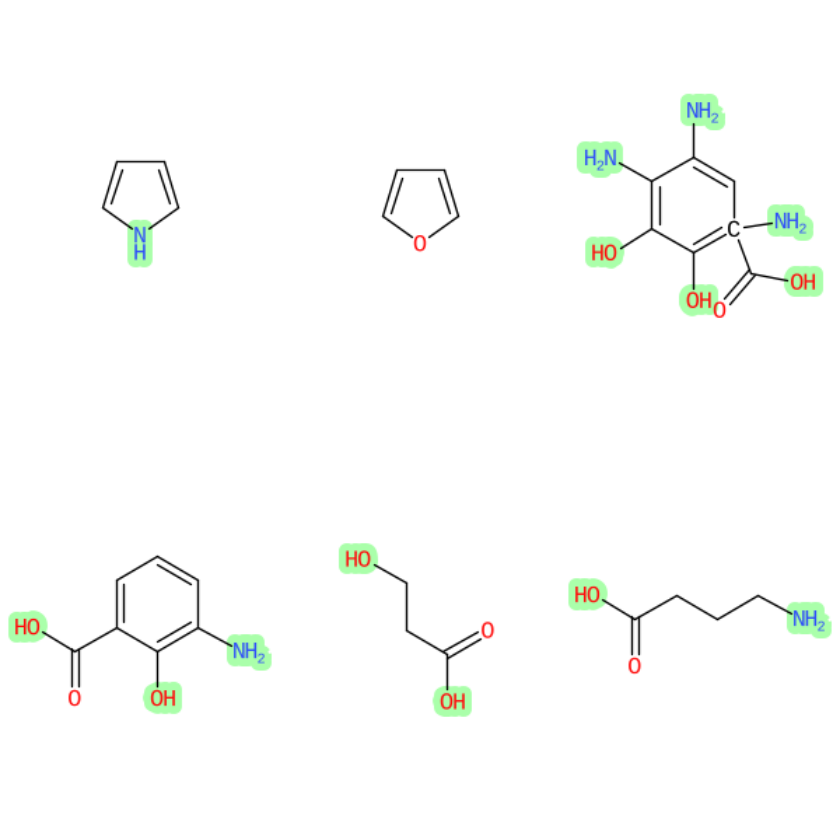

In [81]:
grobs_list=mols2grobs(mols, sma='[#7,#8;!H0]') #  Nitrogen OR Oxygen atoms with atleast 1 hydrogen atom (aromatic oxygen cannot have a bonded hydrogen)
grid.arrange(grobs=grobs_list, ncol=3)

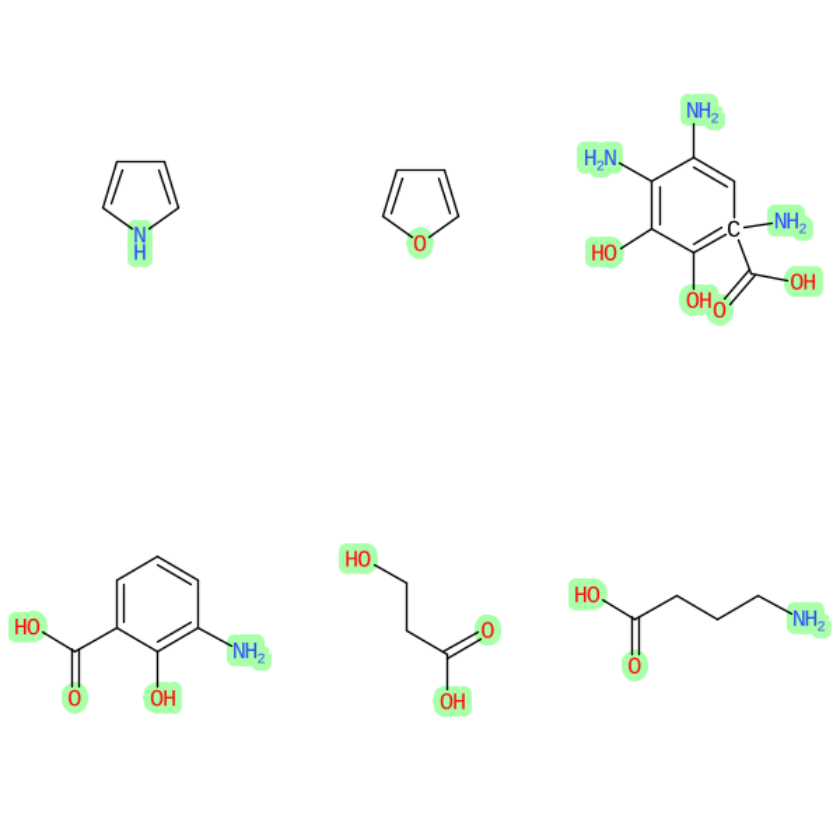

In [82]:
grobs_list=mols2grobs(mols, sma='[#7,#8]') #  Nitrogen OR Oxygen  atoms 
grid.arrange(grobs=grobs_list, ncol=3)

** bold textSubstrucutre/pharmacophore search**

To search for a substructure/pharmacophore/fragment/pattern SMILEs or SMARTs notation of the substructure 
can be used.

In [83]:
install.packages("rcdk")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



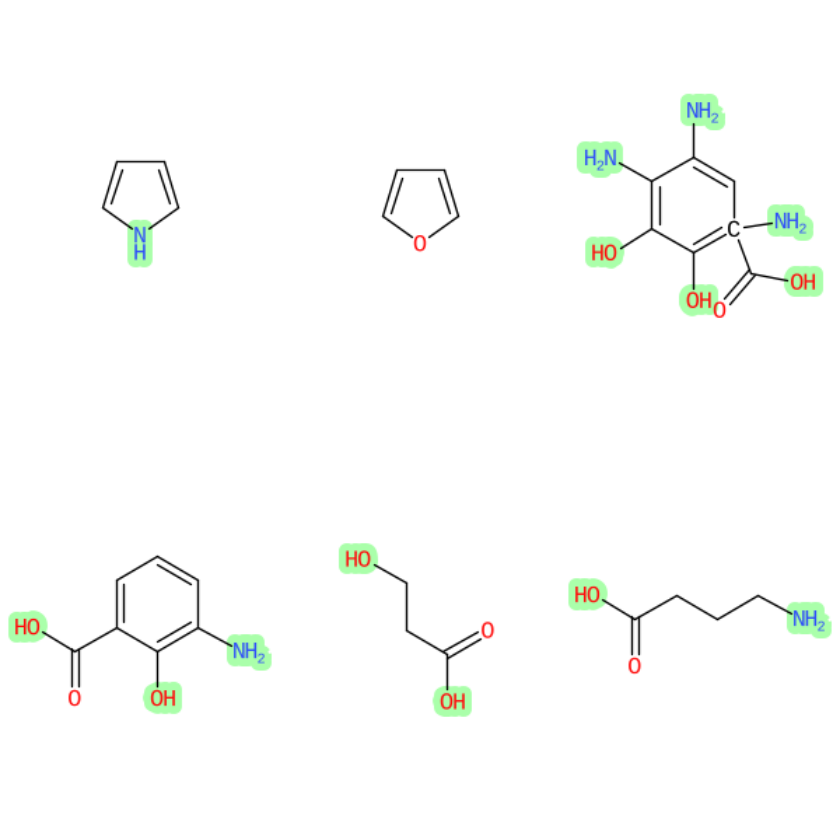

In [84]:
library(rcdk)
library(gridExtra)
smiles = c('c1cccN1','c1ccoc1','OC(=O)c1(N)c(O)c(O)c(N)c(N)c1','OC(=O)c1cccc(N)c1O', 'OC(=O)CCO','OC(=O)CCCN')
mols = parse.smiles(smiles)
grobs_list=mols2grobs(mols, sma='[N,n,O;!H0]') #  N,n,O atoms with atleast 1 hydrogen atom (aromatic oxygen cannot have a bonded hydrogen)
grid.arrange(grobs=grobs_list, ncol=3)

In [85]:
pattern <- matches('[#7,O;!H0]', mols)
pattern

c1cccN1.match                       c1ccoc1.match 
                               TRUE                               FALSE 
OC(=O)c1(N)c(O)c(O)c(N)c(N)c1.match            OC(=O)c1cccc(N)c1O.match 
                               TRUE                                TRUE 
                    OC(=O)CCO.match                    OC(=O)CCCN.match 
                               TRUE                                TRUE

In [86]:
smiles[!pattern]

[1] "c1ccoc1"

In [87]:
pattern <- matches('[N,n,O;!H0]', mols, TRUE)
pattern

$c1cccN1
$c1cccN1$match
[1] TRUE

$c1cccN1$mapping
$c1cccN1$mapping[[1]]
[1] 4



$c1ccoc1
$c1ccoc1$match
[1] FALSE

$c1ccoc1$mapping
NULL


$`OC(=O)c1(N)c(O)c(O)c(N)c(N)c1`
$`OC(=O)c1(N)c(O)c(O)c(N)c(N)c1`$match
[1] TRUE

$`OC(=O)c1(N)c(O)c(O)c(N)c(N)c1`$mapping
$`OC(=O)c1(N)c(O)c(O)c(N)c(N)c1`$mapping[[1]]
[1] 0

$`OC(=O)c1(N)c(O)c(O)c(N)c(N)c1`$mapping[[2]]
[1] 4

$`OC(=O)c1(N)c(O)c(O)c(N)c(N)c1`$mapping[[3]]
[1] 6

$`OC(=O)c1(N)c(O)c(O)c(N)c(N)c1`$mapping[[4]]
[1] 8

$`OC(=O)c1(N)c(O)c(O)c(N)c(N)c1`$mapping[[5]]
[1] 10

$`OC(=O)c1(N)c(O)c(O)c(N)c(N)c1`$mapping[[6]]
[1] 12



$`OC(=O)c1cccc(N)c1O`
$`OC(=O)c1cccc(N)c1O`$match
[1] TRUE

$`OC(=O)c1cccc(N)c1O`$mapping
$`OC(=O)c1cccc(N)c1O`$mapping[[1]]
[1] 0

$`OC(=O)c1cccc(N)c1O`$mapping[[2]]
[1] 8

$`OC(=O)c1cccc(N)c1O`$mapping[[3]]
[1] 10



$`OC(=O)CCO`
$`OC(=O)CCO`$match
[1] TRUE

$`OC(=O)CCO`$mapping
$`OC(=O)CCO`$mapping[[1]]
[1] 0

$`OC(=O)CCO`$mapping[[2]]
[1] 5



$`OC(=O)CCCN`
$`OC(=O)CCCN`$match
[1] TRUE

$`OC(=O)CCCN`$mapping
$`OC(=O)CCCN`$mapping[[1]]
[1] 0

$`OC(=O)CCCN`$mapping[[2]]
[1] 6

**Chemical databases**

https://www.epa.gov/chemical-research/distributed-structure-searchable-toxicity-dsstox-database
https://comptox.epa.gov/dashboard/downloads

ftp://ftp.ncbi.nih.gov/pubchem/Compound/CURRENT-Full/SDF/

In [88]:
install.packages("itertools")
install.packages("rcdk")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [89]:
library(itertools)
library(rcdk)

Loading required package: iterators



In [90]:
moliter=iload.molecules("C:\\data\\DSSTox_v2000_short.sdf", type="sdf")

ERROR: ignored

In [ ]:
iter=ihasNext(moliter)

In [ ]:
while (TRUE) {
  d = try(nextElem(iter))
  if (class(d) != "try-error") print(d)
}

In [ ]:

mols2grobs<-function(mols_list, smarts){
library(grid)
if(missing(smarts)) { smarts='*' }
img_list = lapply(mols_list, function(x){view.image.2d(x, depictor=get.depictor(sma=smarts))})
lapply(img_list, function(x){rasterGrob(x)})
}

**Reading SDF file**

In [ ]:
library(rcdk)
library(itertools)
library(gridExtra)

ERROR: ignored

In [ ]:
moliter=iload.molecules("DSSTox_v2000_short.sdf", type="sdf")
iter=ihasNext(moliter)

In [ ]:
molList=lapply(1:5000, function(i) {
  d = try(nextElem(iter))
  if (class(d) != "try-error") d
}
)
#write.molecules(molList, "DSSTox_v2000_short.sdf", together = TRUE, write.props = TRUE)

In [ ]:
while() {
  d = try(nextElem(iter))
  if (class(d) != "try-error") d
}

In [ ]:
molType=sapply(molList, class)
index=molType=="jobjRef"
molList=molList[index]

In [ ]:
pattern <- matches('[r5]', molList)
molList_r5=molList[pattern]

In [ ]:
grobs_list=mols2grobs(molList[1:6], sma='[N,n,O;!H0]')
grid.arrange(grobs=grobs_list, ncol=3)

In [ ]:
pattern <- matches('[N,n,O;!H0]', molList, TRUE)

In [ ]:
install.packages("BiocManager") #to be done locally in laptop
BiocManager::install("ChemmineR")

In [ ]:
library(ChemmineR)

In [ ]:
 sdfset <- read.SDFset("http://faculty.ucr.edu/~tgirke/Documents/R_BioCond/Samples/sdfsample.sdf") 

In [ ]:
sdfSet=read.SDFset("DSSTox_v2000_short.sdf", skipErrors=FALSE)

In [ ]:
valid <- validSDF(sdfSet)
sdfSet <- sdfSet[valid] # Returns only valid SDFs.

In [ ]:
smartsSearchOB(sdfset[1:5],"[#7, #8]",uniqueMatches=FALSE)

**Molecular Fingerprints and smilarity searching**



In [ ]:
smiles <- c('CCC', 'CCN', 'CCN(C)(C)', 'c1ccccc1Cc1ccccc1','C1CCC1CC(CN(C)(C))CC(=O)CC')
mols <- parse.smiles(smiles)

## get a single fingerprint using the standard
## (hashed, path based) fingerprinter
fp <- get.fingerprint(mols[[1]])

## get MACCS keys for all the molecules
fps <- lapply(mols, get.fingerprint, type='maccs')


In [ ]:

## get Substructure count fingerprint for user defined fragments
library(rcdk)
mols <- parse.smiles(c("CCCO","CCCN","CCN","CCO"))
lapply(mols, convert.implicit.to.explicit)
smarts <- c('[H]', 'C', '[OH]','[NH2]')
fp1 <- get.fingerprint(mols[[1]], type='substructure', fp.mode='count',
    substructure.pattern=smarts)

In [ ]:
df1=lapply(fp1@features, function(x){x= strsplit(as.character(x), split=":"); unlist(x)})
df1=as.data.frame(df1)

df=lapply(fp1@features, function(x){x= strsplit(as.character(x), split=":"); unlist(x)})
df=as.data.frame(df)

In [ ]:
data(bpdata)
mols <- parse.smiles(bpdata[,1])
fps <- lapply(mols, get.fingerprint, type='circular')
fp.sim <- fingerprint::fp.sim.matrix(fps, method='tanimoto')
fp.dist <- 1 - fp.sim
cls <- hclust(as.dist(fp.dist))

In [ ]:
fp.sim <- fingerprint::fp.sim.matrix(fps, method='tanimoto')
fp.dist <- 1 - fp.sim
cls <- hclust(as.dist(fp.dist))

In [ ]:
mol2 <- parse.smiles("C1=CC=CC(=C1)CCCC2=CC=CC=C2")[[1]]
fps <- get.fingerprint(mol2, type='circular', fp.mode='count', circular.type='ECFP0')



```
# This is formatted as code
```

Reading SDF file and finding structural similarity

In [ ]:
library(rcdk)
library(itertools)
library(grid)

In [ ]:
moliter=iload.molecules("DSSTox_v2000_short.sdf", type="sdf")
iter=ihasNext(moliter)

In [ ]:
IDs=readLines("DSSTox_v2000_short.sdf")
IDs=IDs[grep("^DTXSID", IDs)]

In [ ]:
molList=lapply(1:length(IDs), function(i) {
  d = try(nextElem(iter))
  if (class(d) != "try-error") d
}
)

In [ ]:
molType=sapply(molList, class)
index=molType=="jobjRef"
molList=molList[index]

In [ ]:
IDs=IDs[index]

In [ ]:
fps <- get.fingerprint(molList[[1]], type='pubchem')

In [ ]:
img=view.image.2d(molList[[1]])
grid.raster(img)

In [ ]:
fps <- lapply(molList, get.fingerprint, type='pubchem')
fp.sim <- fingerprint::fp.sim.matrix(fps, method='tanimoto')

In [ ]:
colnames(fp.sim)=IDs
row.names(fp.sim)=IDs




Finding similarity between a query compund and DSSTOX database

In [ ]:
mol=parse.smiles('CCCO')
molList1=c(mol, molList)
fps <- lapply(molList1, get.fingerprint, type='pubchem')
fp.sim <- fingerprint::fp.sim.matrix(fps, method='tanimoto')

In [ ]:
colnames(fp.sim)=c("CCCO",IDs)
rownames(fp.sim)=c("CCCO",IDs)

In [ ]:
fp.sim=fp.sim[order(fp.sim[,1], decreasing=TRUE),order(fp.sim[1,], decreasing=TRUE)]

In [ ]:
fp.sim[1,1:10]
fp.simTop=fp.sim[1:100,1:100]

Custering and tree view visualization of similarity matrix

> Indented block



https://www.rdocumentation.org/packages/ape/versions/5.4-1/topics/plot.phylo

In [ ]:
molHc <- hclust(as.dist(1 - fp.simTop), method = "ward.D")
molClust <- cutree(molHc, h=0.7)

In [ ]:
col1=c("red","blue","darkgreen","magenta","brown","black","darkviolet","darkorchid","darkblue","darkred","green","palegreen","purple","violetred1","turquoise1","tomato","tan1","steelblue1","springgreen","slateblue","sienna1","salmon","royalblue","purple","palevioletred","orchid1","orangered","orange","olivedrab1","navyblue","maroon1","mediumpurple","limegreen","indianred1","hotpink","lawngreen","firebrick1","dodgerblue","deepskyblue","deeppink","darkviolet","darkorchid","darkorange","darkgreen","darkblue","coral4","coral","chocolate","chartreuse","brown","blueviolet");

col2=unique(c(colours(distinct = TRUE), grDevices::colors()));
col2=sample(col2)
col3=col2[grep("dark",col2)]
cols=unique(c(col1,col3,col2))

cols=cols[!grepl('gr(a|e)y', cols)]
cols=cols[!grepl("white|black|light|snow|yellow|wheat|pale|gold|darkseagreen",cols)]
cols=cols[!grepl("[1-9]",cols)]
cols=unique(cols[!is.na(cols)])

In [ ]:
library(ape)

In [ ]:
nClus=length(table(molClust))
col=cols[1:nClus]
tipCol = cols[molClust]

In [ ]:
molPhylo=compute.brlen(as.phylo(molHc), power=0.5)

In [ ]:
library(phyloch)

In [ ]:
dfClus=as.data.frame(molClust)
clades=split(row.names(dfClus), dfClus[,1])
edgeCol <- edge.color(molPhylo, clades, col = cols)

In [ ]:
plot(molPhylo,type='fan',tip.color=tipCol, edge.color=edgeCol, label.offset=0.03,no.margin=TRUE, cex = 1,  font=2, edge.width = 2)

In [ ]:
pdf("toxicTree.pdf", width=13.5,height=13)
plot(molPhylo,type='fan',tip.color=tipCol, edge.color=edgeCol, label.offset=0.03,no.margin=TRUE, cex = 1,  font=2, edge.width = 2)
dev.off()

In [ ]:
write.table(fp.simTopMat,"fpsimTopMat.xls", sep="\t", col.names=NA)

Network visualization of similariy matrix 

In [ ]:
library(igraph)

In [ ]:
fp.simTopMat=fp.sim[1:50,1:50]
fp.simTopMat[fp.simTopMat < 0.8]=0
toxiGraph=graph.adjacency(fp.simTopMat,weighted=TRUE,"upper", diag = FALSE)
toxiGraph = connect.neighborhood(toxiGraph, 30)

deg <- degree(toxiGraph, mode="all")
#V(toxiGraph)$size <- deg
E(toxiGraph)$width <- E(toxiGraph)$weight
vertex.label.color="black"
toxiGraph=simplify(toxiGraph)
#toxiGraph= layout_with_fr(toxiGraph)

plot(toxiGraph, vertex.color="red", edge.color="blue", vertex.label.color="black",
vertex.label.cex=0.7, layout=layout_with_fr)

df=as_data_frame(toxiGraph, what="edges")
df=df[!is.na(df)[,3],]
intType=cbind(rep("dd", nrow(df)),rep("TRUE", nrow(df)))
df=data.frame(df[,1:2], intType, df[,3])
colnames(df)=c("source", "target","interaction","directed","value")

write.table(df, "cccoNet", sep="\t", row.names=FALSE)

**[Structure similarity using ChemmineR](https://)**

In [ ]:
sdfset=read.SDFset("DSSTox_v2000_short.sdf", skipErrors=FALSE)
valid <- validSDF(sdfset)
sdfset <- sdfset[valid]

In [ ]:
fpset=fingerprintOB(sdfset, "MACCS")

In [ ]:
 clusters <- cmp.cluster(fpset, cutoff=1, method="Tanimoto")

**In-silico toxicity prediction**

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Rcpi")